# Исследование объявлений о продаже квартир

## 1. Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

###  1.1. Структура данных

Данные выгружены из архива объявлений за несколько лет о продаже квартир real_estate_data.csv<br> 

#### Описание данных<br>

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
•	balcony — число балконов<br>
•	ceiling_height — высота потолков (м)<br>
•	cityCenters_nearest — расстояние до центра города (м)<br>
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
•	first_day_exposition — дата публикации<br>
•	floor — этаж<br>
•	floors_total — всего этажей в доме<br>
•	is_apartment — апартаменты (булев тип)<br>
•	kitchen_area — площадь кухни в квадратных метрах (м²)<br>
•	last_price — цена на момент снятия с публикации<br>
•	living_area — жилая площадь в квадратных метрах (м²)<br>
•	locality_name — название населённого пункта<br>
•	open_plan — свободная планировка (булев тип)<br>
•	parks_around3000 — число парков в радиусе 3 км<br>
•	parks_nearest — расстояние до ближайшего парка (м)<br>
•	ponds_around3000 — число водоёмов в радиусе 3 км<br>
•	ponds_nearest — расстояние до ближайшего водоёма (м)м
•	rooms — число комнат<br>
•	studio — квартира-студия (булев тип)<br>
•	total_area — общая площадь квартиры в квадратных метрах (м²)<br>
•	total_images — число фотографий квартиры в объявлении<br>

### 1.2. Цель работы

1. Провести исследовательский анализ данных
2. Изучить, как быстро продавались квартиры
3. Исследовать, какие факторы больше всего влияют на общую (полную) стоимость объекта
4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

### 1.3. План работы

#### Шаг 1

1.	Загрузить данные из файла в датафрейм.
2.	Изучить общую информацию о полученном датафрейме.

#### Шаг 2

##### 1. Найти и изучить пропущенные значения в столбцах:
- Определить, в каких столбцах есть пропуски;
- Заполнить пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменить на 0. Если логичную замену предложить невозможно, то оставить эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.

##### 2. Рассмотреть типы данных в каждом столбце: 
- Найти столбцы, в которых нужно изменить тип данных;
- Преобразовать тип данных в выбранных столбцах;

##### 3. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.

##### 4. Найти и устранить редкие и выбивающиеся значения. 
Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Обработать подобные аномалии в этом и других столбцах. 
- Если природа аномалии понятна и данные действительно искажены, то восстановить корректное значение;
- В противном случае удалить редкие и выбивающиеся значения.

##### 5.Построить общую гистограмму для всех числовых столбцов таблицы.

#### Шаг 3

Добавить в таблицу новые столбцы со следующими параметрами:
    
- цена одного квадратного метра;<br>
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
- месяц публикации объявления;<br>
- год публикации объявления;<br>
- тип этажа квартиры (значения — «первый», «последний», «другой»);<br>
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

#### Шаг 4

Провести исследовательский анализ данных:

##### 1. Изучите следующие параметры объектов: 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

##### 2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

##### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

##### 4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

##### 5. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name
Вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.


<div class="alert alert-success">
</div>

### Шаг 1. Открытие файла с данными и изучение общей информации. 

Загрузка данных из файла в датафрейм

In [1]:
# импорт библиотек
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import inspect
# "Погашение" предупреждений
import warnings
warnings.filterwarnings("ignore")

# Cразу же для продвинутой работы с графиками (в том числе гистограммами) 
# импортируют библиотеку matplotlib 

try:
    # Чтобы данные не склеивались, применим разделитель колонок sep='\t'
    data = pd.read_csv('C:/Users/1/Documents/Sprint_5/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
import pandas as pd

data = pd.read_csv('C:/Users/1/Documents/Sprint_5/datasets/real_estate_data.csv', sep='\t')
# И сразу же для продвинутой работы с графиками (в том числе гистограммами) 
# импортируют библиотеку matplotlib 


In [3]:
# Функция вычисления пропущенных значений датасета
def missing_values_table(data):
        # Общее количество пропусков
        mis_val = data.isnull().sum()
        
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Создание таблицы с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование колонок
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропуски', 1 : 'Доля, %'})
        
        # Сортировка значений по доле пропусков
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Доля, %', ascending=False).round(1)
        
        # Печать общей информации
        print ("Выбранный датафрейм имеет " + str(data.shape[1]) + " столбцов.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов имеют пропуски значений.")
        
        # Return
        return mis_val_table_ren_columns

In [4]:
# Функция визуализации данных для исследования признаков
def grafik(data, col):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    title_col_box = 'Диаграмма "ящик с усами" ' + col
    title_col_gist = 'Гистограмма данных ' + col
    title_col_kde = 'Распределение данных ' + col
    sns.boxplot(x=col, data=data, color='red', ax=ax1).set(title=title_col_box)
    histos = data[col].hist(bins=20, color='blue', ax=ax2).set(title=title_col_gist, 
                            xlabel="Объем", ylabel=col)
    # Построим распределение значений на графике
    sns.kdeplot(data=data[[col]], fill=True, color='blue', ax=ax3)
    plt.title(title_col_kde)
    plt.xlabel(col)
    plt.ylabel('Плотность')
    print(data[col].describe())
    return

In [5]:
# Проверка коррелляции данных в таблице
def plot_corr_heatmap(coeff, title):
    """
    Функция для отрисовки матрицы корелляции с использованием тепловой карты.
    
    coeff: pd.DataFrame, корелляционная матрица
    title: str, название графика
    """
    
    ax = sns.heatmap(
        coeff,
        annot=True,                                             # добавляем численные значения в каждую строчку
        fmt='.01f',
        mask=np.triu(np.ones_like(coeff)),                      # отображаем только нижний треугольник матрицы
        cmap='coolwarm',                                        # выбираем цветовую палитру
        cbar=False,                                             # отключаем полосу цвета
        xticklabels=coeff.columns[:-1],                         # устанавливаем подписи, убираем последнюю
        yticklabels=coeff.columns[1:].insert(0, ''),            # устанавливаем подписи, скрываем первую
        linewidth=.5,
        
        #linewights=1,
    )
    ax.set_facecolor('white')                                   # устанавливаем цвет фона
    
    plt.tick_params(bottom=False, left=False)                   # отключаем отображение засечек
    plt.title(title, y=0.9, font=dict(size=15, family='sans-serif'))

Изучение общей информации о полученном датафрейме

In [6]:
# Выводим первые 5 строк таблицы
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [7]:
# Узнаем больше информации методом info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверка пропущенных данных в датасете

In [8]:
# Проверим датасет на наличие дубликатов:
print(data.duplicated().sum())

0


<div style="border:solid green 2px; padding: 20px">

**Подведем итоги по Шагу 1. Общая информация о датасете:**
    
Подключились к библиотеке pandas, открыли файл с данными. Вывели первые 5 строк таблицы. 
Узнали больше информации о датасете с помощью метода info.

Всего в датасете с данными - 23 669 строк. Типы данных корректные. Не вызывают сомнений и замечаний.    
Дубликатов в данных нет.

<div class="alert alert-success">
</div>

### Шаг 2. Предобработка данных и анализ признаков

#### Изучение пропущенных значений в столбцах

In [9]:
missing_values_table(data)

Выбранный датафрейм имеет 22 столбцов.
Из них 14 столбцов имеют пропуски значений.


,Пропуски,"Доля, %"
is_apartment,20924,88.3
parks_nearest,15620,65.9
ponds_nearest,14589,61.6
balcony,11519,48.6
ceiling_height,9195,38.8
airports_nearest,5542,23.4
cityCenters_nearest,5519,23.3
parks_around3000,5518,23.3
ponds_around3000,5518,23.3
days_exposition,3181,13.4


*Предстоит задача заполнения пропусков по выявленным признакам. Так мы точечно повысим уровень дисперсии выборки.*<br>

• is_apartment — апартаменты (булев тип)<br>
• parks_nearest — расстояние до ближайшего парка (м)<br>
• ponds_nearest — расстояние до ближайшего водоёма (м)м • rooms — число комнат<br>
• balcony — число балконов<br>
• ceiling_height — высота потолков (м)<br>
• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
• cityCenters_nearest — расстояние до центра города (м)<br>
• parks_around3000 — число парков в радиусе 3 км<br>
• ponds_around3000 — число водоёмов в радиусе 3 км<br>
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
• kitchen_area — площадь кухни в квадратных метрах (м²)<br>
• living_area — жилая площадь в квадратных метрах (м²)<br>
• floors_total — всего этажей в доме<br>
• locality_name — название населённого пункта<br>

***Обработка признака Is_apartment***

***Очевидно, что большая часть недвижимости в продаже - не аппартаменты. И при внесении информации в БД зачастую данное поле игнорировалось специалистами отдела недвижимости. Поэтому в столбце "is_apartment" заменим все пропуски на False.***

In [10]:
# Проверим кол-во NaN в столбце 'is_apartment' до преобразования
print('Кол-во строк is_apartment со значением NaN до:', data['is_apartment'].isna().sum()) 

# Применяем метод замены пустых значений на медианы:
data['is_apartment'] = data['is_apartment'].fillna(False)

# Проверим кол-во NaN в столбце 'is_apartment' после преобразования
print('Кол-во строк is_apartment со значением NaN после:', data['is_apartment'].isna().sum())   

Кол-во строк is_apartment со значением NaN до: 20924
Кол-во строк is_apartment со значением NaN после: 0


***Обработка признаков cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest***

Оставшиеся пропуски NaN в столбцах cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest заменим на максимальные значения расстояний, либо на 0. Если данные не заполнены, то вероятнее всего по близости этих целей не было, либо они не играют роли для данных жилых помещений.

* airports_nearest (расстояние до ближайшего аэропорта в метрах) - ставим **max**;
* cityCenters_nearest (расстояние до центра города) - ставим **max**;
* parks_around3000 (число парков в радиусе 3 км) - ставим **0**;
* parks_nearest (расстояние до ближайшего парка) - ставим **max**;
* ponds_around3000 (число водоёмов в радиусе 3 км) - ставим **0**;
* ponds_nearest (расстояние до ближайшего водоёма) - ставим **max**

In [11]:
# Проверим кол-во NaN в столбцах до преобразования
print('Кол-во строк parks_around3000 со значением NaN до:', data['parks_around3000'].isna().sum()) 
print('Кол-во строк ponds_around3000 со значением NaN до:', data['ponds_around3000'].isna().sum()) 
print('Кол-во строк airports_nearest со значением NaN до:', data['airports_nearest'].isna().sum()) 
print('Кол-во строк cityCenters_nearest со значением NaN до:', data['cityCenters_nearest'].isna().sum()) 
print('Кол-во строк parks_nearest со значением NaN до:', data['parks_nearest'].isna().sum()) 
print('Кол-во строк ponds_nearest со значением NaN до:', data['ponds_nearest'].isna().sum()) 

# Заменяем NaN в столбцах parks_around3000, ponds_around3000 но 0:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# Применяем метод замены пустых значений на max:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].max()
    
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].max()
    
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].max()
        
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].max()

# Оставшимся присвоим максимальное значение из всей выборки
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].max())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].max())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].max())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].max())

# Проверим кол-во NaN в столбцах после преобразования
print('*****') 
print('Кол-во строк parks_around3000 со значением NaN после:', data['parks_around3000'].isna().sum()) 
print('Кол-во строк ponds_around3000 со значением NaN после:', data['ponds_around3000'].isna().sum()) 
print('Кол-во строк airports_nearest со значением NaN после:', data['airports_nearest'].isna().sum()) 
print('Кол-во строк cityCenters_nearest со значением NaN после:', data['cityCenters_nearest'].isna().sum()) 
print('Кол-во строк parks_nearest со значением NaN после:', data['parks_nearest'].isna().sum()) 
print('Кол-во строк ponds_nearest со значением NaN после:', data['ponds_nearest'].isna().sum()) 

Кол-во строк parks_around3000 со значением NaN до: 5518
Кол-во строк ponds_around3000 со значением NaN до: 5518
Кол-во строк airports_nearest со значением NaN до: 5542
Кол-во строк cityCenters_nearest со значением NaN до: 5519
Кол-во строк parks_nearest со значением NaN до: 15620
Кол-во строк ponds_nearest со значением NaN до: 14589
*****
Кол-во строк parks_around3000 со значением NaN после: 0
Кол-во строк ponds_around3000 со значением NaN после: 0
Кол-во строк airports_nearest со значением NaN после: 0
Кол-во строк cityCenters_nearest со значением NaN после: 0
Кол-во строк parks_nearest со значением NaN после: 0
Кол-во строк ponds_nearest со значением NaN после: 0


***Обработка признака Balcony***

*В столбце balcony есть строки, где не указано число балконов. Из общего числа строк — 51,4% заполнены. Скорее всего, в остальных 48,6% балконов нет. Такие пропуски заменим на 0 и преобразуем столбец к целочисленному типу данных (int).*

In [12]:
print('Кол-во строк balcony со значением NaN до:', data['balcony'].isna().sum()) 
data['balcony'] = data['balcony'].fillna(0).astype(int)
print('Кол-во строк balcony со значением NaN после:', data['balcony'].isna().sum()) 
# display(data['balcony'].value_counts())

Кол-во строк balcony со значением NaN до: 11519
Кол-во строк balcony со значением NaN после: 0


***Обработка признаков Ceiling_height и floors_total***

Столбец ceiling_height заполнен всего на 61% строк. Пропуски NaN в столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу. Для этого напишем цикл перебирающий уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменим NaN на медианное значение высоты потолков по каждой уникальной высоте дома.

In [13]:
# Организуем цикл для перезаписи пустых значений на медиану
# Но сначала проверка строк ceiling_height с NaN до процедуры изменения
print('Кол-во строк ceiling_height со значением NaN до:', data['ceiling_height'].isna().sum())

# Далее начинаем заполнять пустоты в ceiling_height медианой

# 1 вариант заполнения пустых NaN на медиану:
data['ceiling_height'] = (data['ceiling_height']
                          .fillna(data.groupby('floors_total')['ceiling_height']
                          .transform('median')))

# 2 вариант заполнения NaN на медиану в цикле for
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

print('Кол-во строк ceiling_height со значением NaN после:', data['ceiling_height'].isna().sum())

Кол-во строк ceiling_height со значением NaN до: 9195
Кол-во строк ceiling_height со значением NaN после: 78


In [14]:
display((data.loc[data['ceiling_height'].isnull()]).head(3)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,1337.0,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,3190.0,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0


Видно, что оставшиеся стольцы 'ceiling_height' с пропусками NaN, не смогли заполниться медианным значением, так как значения столбца 'floors_total' также не определены и имеют пропуски NaN. Причём их количество было 86. Избавимся от пропусков в floors_total.

In [15]:
# Сначала проверка строк ceiling_height с NaN до процедуры изменения
print('Кол-во строк floors_total со значением NaN до:', data['floors_total'].isna().sum()) 
print('Кол-во строк ceiling_height со значением NaN до:', data['ceiling_height'].isna().sum()) 

# Избавляемся от пропусков в floors_total
data = data.dropna(subset=['floors_total']) 
# и преобразуем столбец к целочисленному типу данных (int).
data['floors_total'] = data['floors_total'].astype(int)

# Проверка строк ceiling_height с NaN после процедуры изменения
print('Кол-во строк floors_total со значением NaN после:', data['floors_total'].isna().sum()) 
print('Кол-во строк ceiling_height со значением NaN после:', data['ceiling_height'].isna().sum())

Кол-во строк floors_total со значением NaN до: 86
Кол-во строк ceiling_height со значением NaN до: 78
Кол-во строк floors_total со значением NaN после: 0
Кол-во строк ceiling_height со значением NaN после: 1


Проверим, что за строка с NaN осталась в столбце 'ceiling_height'

In [16]:
display((data.loc[data['ceiling_height'].isnull()]).head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33,53.0,32,False,...,21.0,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,53.0


Какая-то только одна 3-хкомнатная квартира продается в 33-этажном доме. Предположительно это единственное жилое помещение в 33-хэтажных домах. Сколько жилых помещений вообще продается в высотках от 29 до 35 этажей? Проверим.

In [17]:
display((data.loc[(data['floors_total'] > 29) & (data['floors_total'] < 36)])
         .sort_values(by='floors_total', ascending=True).head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33,53.0,32,False,...,21.0,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,53.0
1697,11,3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34,18.0,23,False,...,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,410.0
871,14,7777777.0,75.0,2017-11-16T00:00:00,2,2.70,35,40.5,23,False,...,11.7,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,169.0
21599,12,6200000.0,51.0,2017-08-27T00:00:00,2,2.70,35,27.0,13,False,...,19.0,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,NaN
20938,18,9900000.0,100.9,2019-04-08T00:00:00,3,2.70,35,53.4,22,False,...,13.4,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,NaN


Из выборки видно, что действительно только одна квартира выставлена на продажу в 33-хэтажном доме, в связи с чем медиана значений по высоте потолков относительно этажности домов не смогла вычислиться. А так, получается что в среднем в высотных домах высота потолков равна 2,7 м. Поэтому заменим значение NaN в 'ceiling_height' в 33-хэтажном доме на высоту потолков, равную 2,7 м. 

In [18]:
# Избавляемся от пропусков в 'ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(2.70)

# Проверка строк ceiling_height с NaN после процедуры изменения
print('Кол-во строк floors_total со значением NaN после:', data['floors_total'].isna().sum()) 
print('Кол-во строк ceiling_height со значением NaN после:', data['ceiling_height'].isna().sum())

Кол-во строк floors_total со значением NaN после: 0
Кол-во строк ceiling_height со значением NaN после: 0


Повторно проверим результаты.

In [19]:
display((data.loc[(data['floors_total'] > 29) & (data['floors_total'] < 36)])
         .sort_values(by='floors_total', ascending=True).head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,2.70,33,53.0,32,False,...,21.0,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,53.0
1697,11,3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34,18.0,23,False,...,NaN,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,410.0
871,14,7777777.0,75.0,2017-11-16T00:00:00,2,2.70,35,40.5,23,False,...,11.7,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,169.0
21599,12,6200000.0,51.0,2017-08-27T00:00:00,2,2.70,35,27.0,13,False,...,19.0,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,NaN
20938,18,9900000.0,100.9,2019-04-08T00:00:00,3,2.70,35,53.4,22,False,...,13.4,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,NaN


Отлично. Теперь проверим высоты потолков в БД. Вдруг найдутся аномалии?

count    23613.000000
mean         2.735915
std          0.996069
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


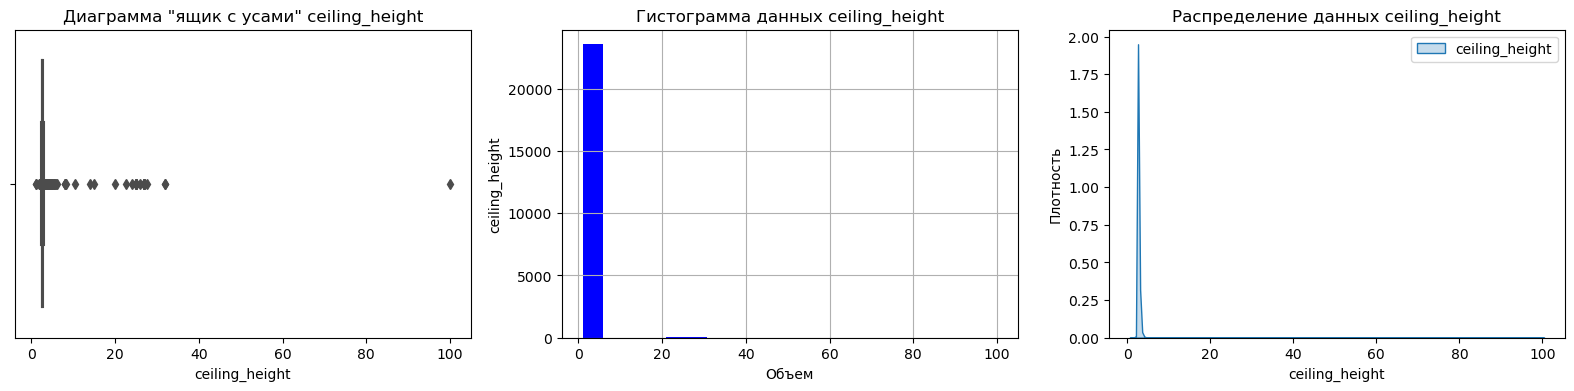

In [20]:
grafik(data, 'ceiling_height')

In [21]:
# Проверка высот потолков до обработки данных
print('Минимальная высота потолков: ', (data['ceiling_height'].min()), 'м')
print('Максимальная высота потолков: ', (data['ceiling_height'].max()), 'м')

Минимальная высота потолков:  1.0 м
Максимальная высота потолков:  100.0 м


Имеются выбросы с высотой потолков менее 1,75 м и выше 10 метров. Это явные аномалии. Проверим все уникальные высоты потолков в выборке.

In [22]:
# Проверим высоту потолков. 
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.3, 

В выборке имеются аномальные высоты 1.0, 1.2, 10.3, 14.0, 14.85, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0 метров. Заменим их на нормальные.

In [23]:
display((data.loc[(data['ceiling_height'] < 1.75) | (data['floors_total'] > 10)])
         .sort_values(by='ceiling_height', ascending=True))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2,27.5,1,False,...,5.20,0,городской посёлок Мга,84869.0,65968.0,0.0,3190.0,0.0,1344.0,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,71.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12,15.0,9,False,...,11.80,1,Кудрово,84869.0,65968.0,0.0,3190.0,0.0,1344.0,62.0
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18,16.6,9,False,...,8.80,2,Тосно,84869.0,65968.0,0.0,3190.0,0.0,1344.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17496,15,6700000.0,92.90,2019-02-19T00:00:00,3,20.00,17,53.2,14,False,...,12.00,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,1337.0,NaN
20507,12,5950000.0,60.00,2018-02-19T00:00:00,2,22.60,14,35.0,11,False,...,13.00,1,Санкт-Петербург,27028.0,12570.0,0.0,3190.0,0.0,1337.0,40.0
5807,17,8150000.0,80.00,2019-01-09T00:00:00,2,27.00,36,41.0,13,False,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,38.0
4876,7,3000000.0,25.00,2017-09-27T00:00:00,0,27.00,25,17.0,17,False,...,NaN,2,посёлок Мурино,84869.0,65968.0,0.0,3190.0,0.0,1344.0,28.0


Всего 22 таких жилых помещений. Попробуем их заменить на медианы относительно этажности домов.

In [24]:
# Заполнение аномальных высот потолков на медиану в цикле for
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'] < 1.75), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()    
    
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'] > 3), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

In [25]:
# Проверим высоту потолков. 
print(sorted(data['ceiling_height'].unique()))

[1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 14.85]


В выборке остались жилые помещения высотой 14,85 м. Проверим, что это за помещения.

In [26]:
display((data.loc[(data['ceiling_height'] > 3)])
         .sort_values(by='ceiling_height', ascending=True).head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,14.85,36,21.4,28,False,...,18.7,1,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,14.85,36,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,3190.0,3.0,80.0,38.0


Оба жилых помещения находятся в 36-этажном доме. И оба высотой 14,85 м. Медиана естестественно тоже равна 14,85 м. Исправим эту ситуацию, заменив аномальную высоту потолков на крайнюю ближайшую = 3,0 м.

In [27]:
# Создаем цикл и заменям аномальные высоты на более правдоподобные
for t in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == 14.85), 'ceiling_height'] = 3.0
    
# Проверка выполнения замены ошибочных данных по высотам потолков
print('Минимальная высота потолков: ', (data['ceiling_height'].min()), 'м')
print('Максимальная высота потолков: ', (data['ceiling_height'].max()), 'м')

Минимальная высота потолков:  1.75 м
Максимальная высота потолков:  3.0 м


***Обработка признака living_area***

В столбце living_area всего 1903 пропуска.

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


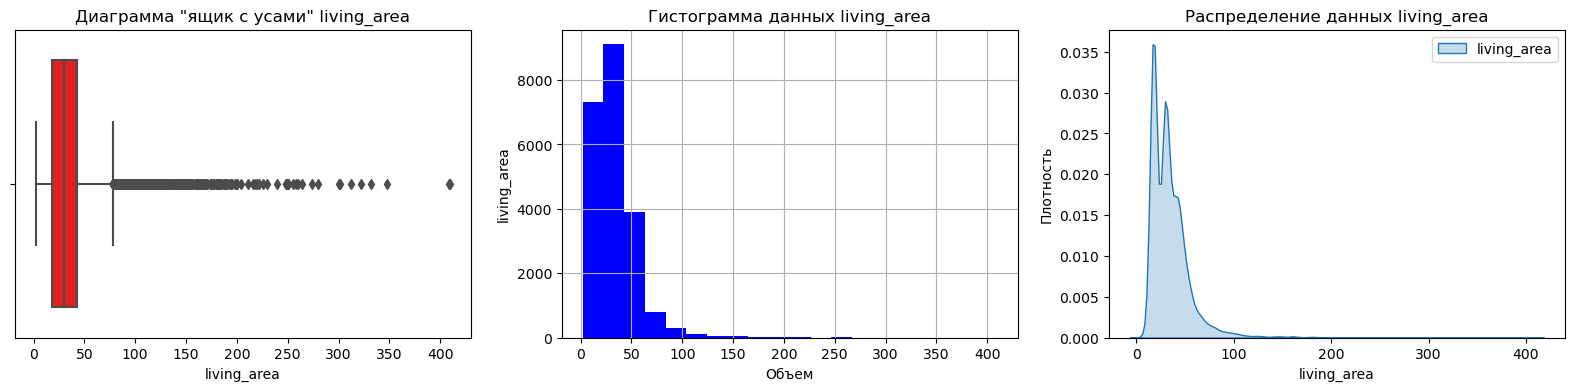

In [28]:
grafik(data, 'living_area')

Пропуски в столбце "living_area" заменим по аналогии на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".

In [29]:
# Проверим кол-во NaN в столбце 'living_area' до преобразования
print('Кол-во строк living_area со значением NaN до:', data['living_area'].isna().sum()) 

# Применяем метод замены пустых значений на медианы:
data['living_area'] = (data['living_area']
                         .fillna(data.groupby('rooms')
                         ['living_area'].transform('median'))
                      )
# Проверим кол-во NaN в столбце 'living_area' после преобразования
print('Кол-во строк living_area со значением NaN после:', data['living_area'].isna().sum())                  

Кол-во строк living_area со значением NaN до: 1870
Кол-во строк living_area со значением NaN после: 0


***Обработка признака kitchen_area***

В столбце kitchen_area всего 2278 пропусков. 

In [30]:
display((data.loc[data['kitchen_area'].isnull()]).head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14,45.0,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9,17.6,2,False,...,NaN,0,Коммунар,84869.0,65968.0,0.0,3190.0,0.0,1344.0,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,30.5,1,False,...,NaN,0,поселок городского типа Красный Бор,84869.0,65968.0,0.0,3190.0,0.0,1344.0,196.0


Заменим пропуски в столбце kitchen_area на медианы значений площади кухни по каждому значению жилой площади квартиры столбца living_area. Для этого напишем соответствующий код.

In [31]:
print('Кол-во строк kitchen_area со значением NaN до:', data['kitchen_area'].isna().sum()) 

# Используем другой вариант заполнения пустых NaN на медиану
data['kitchen_area'] = (data['kitchen_area']
                         .fillna(data.groupby('living_area')
                         ['kitchen_area'].transform('median')) 
                       )

print('Кол-во строк kitchen_area со значением NaN после:', data['kitchen_area'].isna().sum()) 

Кол-во строк kitchen_area со значением NaN до: 2231
Кол-во строк kitchen_area со значением NaN после: 61


Осталось 61 строка с NaN по столбцу 'kitchen_area'. Очевидно, что произошла аналогичная ситуация с обработкой данных, как это было с 'ceiling_height'. Только одна квартира выставлена на продажу с некоторыми уникальными площадями 'living_area', в связи с чем медиана значений по высоте потолков относительно этажности домов не смогла вычислиться и осталась NaN. 

Теперь заменим пропуски в столбце 'kitchen_area' на медианы значений площади кухни по кол-ву комнат столбца 'rooms'. Для этого напишем соответствующий код.

In [32]:
print('Кол-во строк kitchen_area со значением NaN до:', data['kitchen_area'].isna().sum()) 

# Используем другой вариант заполнения пустых NaN на медиану
data['kitchen_area'] = (data['kitchen_area']
                         .fillna(data.groupby('rooms')
                         ['kitchen_area'].transform('median')) 
                       )

# Проверим кол-во оставшихся NaN в столбце 'kitchen_area'
# display(data['kitchen_area'].isna().value_counts())
# Вывод показал, что осталось еще 194 строки с записью NaN. 

# Исключим эти 194 строки с записью "  nan", как вероятные ошибки данных.
#data.loc[data['kitchen_area'] == '  nan','kitchen_area'] = None
#data = data.dropna(subset=['kitchen_area'])

# Проверим повторно кол-во NaN в столбце 'kitchen_area'
print('Кол-во строк kitchen_area со значением NaN после:', data['kitchen_area'].isna().sum()) 

Кол-во строк kitchen_area со значением NaN до: 61
Кол-во строк kitchen_area со значением NaN после: 0


***Обработка признака Locality_name***

В столбце названия населенного пункта 'locality_name' выявлено всего 49 пропусков. Наименования населенных пунктов к сожалению никак невозможно восстановить, опираясь на смежные признаки. Поэтому их просто удалим из выборки.

In [33]:
# Проверим кол-во NaN в столбце 'locality_name' до преобразования
print('Кол-во строк locality_name со значением NaN до:', data['locality_name'].isna().sum()) 
# Значений NaN всего 48, что составляет 0,2% от общего объема строк

# исключим пропуски в столбце "locality_name"
data = data.dropna(subset=['locality_name'])

# Проверим кол-во NaN в столбце 'locality_name' после преобразования
print('Кол-во строк locality_name со значением NaN после:', data['locality_name'].isna().sum()) 

Кол-во строк locality_name со значением NaN до: 48
Кол-во строк locality_name со значением NaN после: 0


*Выведем на экран перечень уникальных записей из столбца locality_name*

In [34]:
# Список уникальных записей в locality_name
display(sorted(data['locality_name'].unique()))
# Подсчет записей в locality_name
# display(data['locality_name'].count())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Список уникальных записей в 'locality_name' показал, что очень много задвоений из-за буквы "ё" и "е". Это ожидаемая ошибка, человеческий фактор. Вносили от руки. Если бы внесение было организовано через выпадающий заранее подготовленный список, этих ошибок можно было бы избежать.

Задвовений 31 шт. Например: городской поселок Янино-1, поселок Аннино и др.

In [35]:
# Сделаем просто. Во-впервых, изменим тип locality_name на str.
# И заменим все "ё" на "е". 
data['locality_name'] = data['locality_name'].astype(str)
data['locality_name'] = data['locality_name'].str.replace('ё','е')

# Еще раз проверим locality_name
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

Как можно заметить, больше задвоений нет! Продолжаем...

***Обработка признака Day_exposition***

Пропуски в столбце 'day_exposition' заменим по аналогии на медианы значений жилой площади по каждому значению first_day_exposition.

In [36]:
# Проверим кол-во NaN в столбце 'day_exposition' до преобразования
print('Кол-во строк days_exposition со значением NaN до:', data['days_exposition'].isna().sum()) 

# 2 вариант заполнения NaN на медиану в цикле for
for t in data['locality_name'].unique():
    data.loc[(data['first_day_exposition'] == t) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['first_day_exposition'] == t), 'days_exposition'].mean()
    
# Остаток (111 строк) NaN после отладки просто заменяем на 0. Для нас это не существенно,
# но строки не потеряем
data['days_exposition'] = data['days_exposition'].fillna(0)
    
print('Кол-во строк days_exposition со значением NaN после:', data['days_exposition'].isna().sum()) 

Кол-во строк days_exposition со значением NaN до: 3171
Кол-во строк days_exposition со значением NaN после: 0


***Финальная проверка датасета на пропуски***

In [37]:
missing_values_table(data)

Выбранный датафрейм имеет 22 столбцов.
Из них 0 столбцов имеют пропуски значений.


,Пропуски,"Доля, %"


***Построение общих гистограмм для всех числовых столбцов таблицы***

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


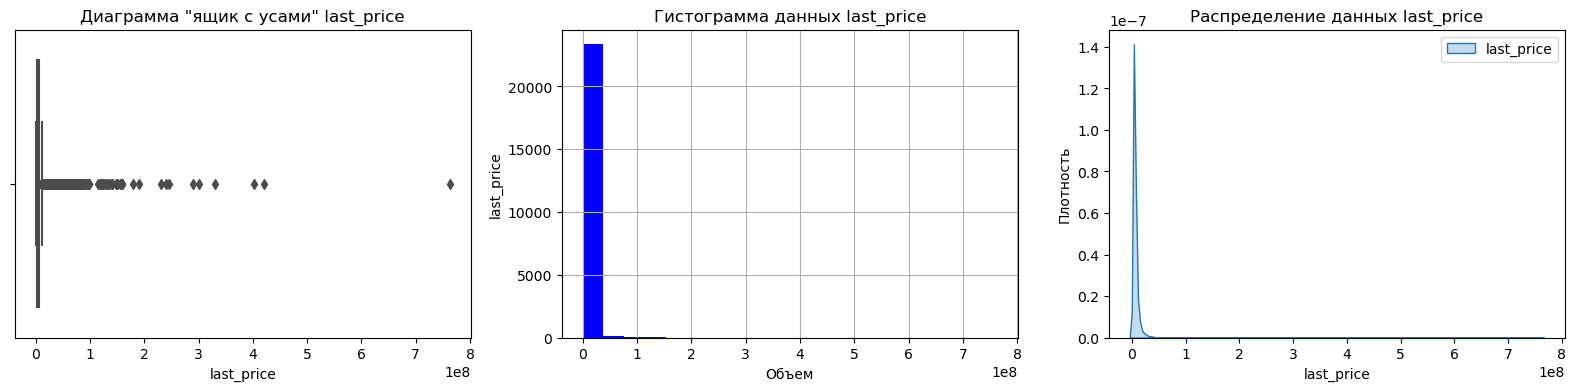

In [38]:
grafik(data, 'last_price')

In [39]:
# Проверка выполнения замены ошибочных данных по высотам потолков
print('Минимальная стоимость: ', (data['last_price'].min()), 'руб.')
print('Максимальная стоимость: ', (data['last_price'].max()), 'руб.')

Минимальная стоимость:  12190.0 руб.
Максимальная стоимость:  763000000.0 руб.


Насчет максимальной стоимости жилья, здесь возможно всё и выбросы вполне провдоподобны. Подавляющее количество квартир стоимостью свыше 100 млн рублей продаётся в Петроградском районе. А вот насчёт стоимости 12190 руб, здесь явно аномалия.

In [40]:
display(data.loc[(data['last_price'] < 200000)]
         .sort_values(by='floors_total', ascending=True))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,1337.0,8.0


Что ж, это двухкомнатная квартира в Санкт-Петербурге. И она не может стоить всего 12190 руб. Воспользуемся фильтром по общей площади жилья 'total_area' и городом продажи 'locality_name'. Причем площадь жилья ограничим между 100 м2 и 150 м2.

In [41]:
display((data.loc[(data['total_area'] > 100) & (data['total_area'] < 150) & (data['locality_name'] == 'Санкт-Петербург')])
         .sort_values(by='last_price', ascending=True).head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,1337.0,8.0
17753,12,1800000.0,117.3,2016-02-18T00:00:00,5,3.00,4,23.6,2,False,...,12.9,0,Санкт-Петербург,24670.0,5238.0,0.0,3190.0,0.0,1337.0,139.0
19952,7,2200000.0,138.7,2016-06-24T00:00:00,4,3.00,7,90.7,5,False,...,13.7,0,Санкт-Петербург,25221.0,4069.0,0.0,3190.0,2.0,653.0,203.0
13692,13,5799000.0,110.2,2016-04-13T00:00:00,4,3.00,7,67.0,1,False,...,10.9,0,Санкт-Петербург,40088.0,19142.0,0.0,3190.0,2.0,266.0,1048.0
10333,11,6390000.0,111.0,2018-11-22T00:00:00,3,2.55,16,64.0,7,False,...,14.0,1,Санкт-Петербург,18446.0,21871.0,0.0,3190.0,2.0,924.0,32.0


Так и есть - ошибка в стоимости жилья. Исправим её.

In [42]:
# Создаем цикл и заменям аномальные высоты на более правдоподобные
for t in data['total_area'].unique():
    data.loc[(data['total_area'] == t) & (data['last_price'] == 12190), 'last_price'] = 1290000

In [43]:
# Проверка выполнения замены ошибочных данных по высотам потолков
print('Минимальная стоимость: ', (data['last_price'].min()), 'руб.')
print('Максимальная стоимость: ', (data['last_price'].max()), 'руб.')

Минимальная стоимость:  430000.0 руб.
Максимальная стоимость:  763000000.0 руб.


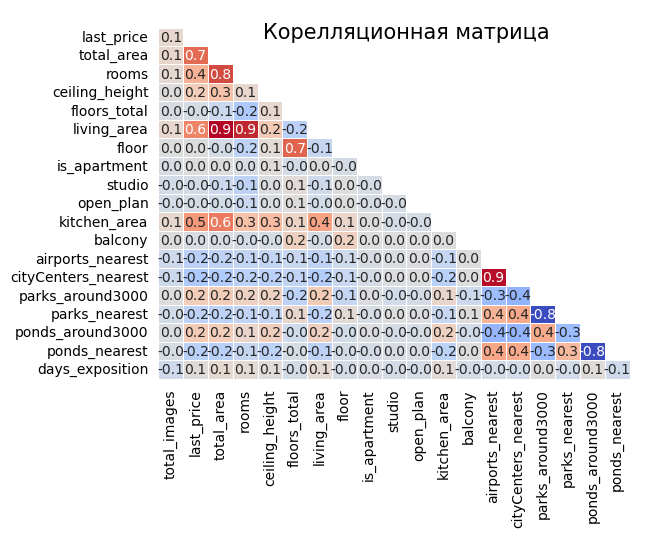

In [44]:
plot_corr_heatmap(data.corr(), 'Корелляционная матрица')

Выявлена сильная прямая коррелляция между количеством комнат и общей площадью жилья, стоимостью жилья и её общей площади, площади жилой площади от кол-ва комнат и общей площади, расстояния от центра и от аэропорта. В общем, эти коррелляции очевидны были и без исследования, но цифры никогда лишними не бывают в исследовательском проекте данных.

In [45]:
missing_values_table(data)

Выбранный датафрейм имеет 22 столбцов.
Из них 0 столбцов имеют пропуски значений.


,Пропуски,"Доля, %"


<div style="border:solid green 2px; padding: 20px">

**Подведем итоги по Шагу 2. Предобработка данных и анализ признаков:** 
    
С помощью заранее написанной функции вычисления пропущенных значений датасета missing_values_table вывели на экран список характерных значений, дающих представление о выборке. Выборочно проверили наиболее интересные для исследования столбцы с пропущенными данными в строках.
    
В первоначальном файле было 23 699 строк.
Исходный датасет состоял из 14 столбцов таблицы, которые были заполнены не полностью:
   * ceiling_height (высота потолков, 14504 строк, доля заполненности 61%);
   * floors_total (всего этажей в доме, 23613, доля заполненности 99,6%);
   * living_area (жилая площадь в квадратных метрах, 21796, доля заполненности 92%);
   * is_apartment (апартаменты True/False, 2775, доля заполненности 12%);
   * kitchen_area (площадь кухни в квадратных метрах, 21421, доля заполненности 90,4%);
   * balcony (число балконов, 12180, доля заполненности 51,4%);
   * locality_name (название населённого пункта, 23650, доля заполненности 99,8%);
   * airports_nearest (расстояние до ближайшего аэропорта в метрах, 18157, доля заполненности 76,6%);
   * cityCenters_nearest (расстояние до центра города, 18180, доля заполненности 76,7%);
   * parks_around3000 (число парков в радиусе 3 км, 18181, доля заполненности 76,7%);
   * parks_nearest (расстояние до ближайшего парка, 8079, доля заполненности 34,1%);
   * ponds_around3000 (число водоёмов в радиусе 3 км, 18181, доля заполненности 76,7%);
   * ponds_nearest (расстояние до ближайшего водоёма, 9110, доля заполненности 34,8%);
   * days_exposition (сколько дней было размещено объявление, 20518, доля заполненности 86,6%)

Остальные столбцы заполнены полностью:
   * total_images (число фотографий квартиры в объявлении);
   * last_price (цена на момент снятия с публикации);
   * total_area (общая площадь квартиры в квадратных метрах );
   * first_day_exposition (дата публикации);
   * rooms (число комнат);
   * floor (этаж);
   * studio (квартира-студия True/False); 
   * open_plan (свободная планировка True/False).
    
Поэтапно были проведены процедуры замены пустых строк со значениями NaN на медианные значения, либо удаления проблемных строк,и не влияющих на дальнейшее исследование.
    
В итоге после обработки датасета качественно заполненных строк осталось 23565 строк из 23699, что составило . Или 99,43% от исходного количества. 
    
С помощью функции grafik() исследованы все значимые признаки на наличие аномалий. Частично выявленные аномалии были обработаны. В итоге практически во всех признаках добились исключения существенных отклонений медианы от среднего значения. Это значит, что почти по всем показателям существенных аномалий больше не выявлено, кроме столбца days_exposition. По кол-ву дней размещения объявления среднее вдвое больше медианного значения. Здесь имеется длинный хвост, так как в выборке имеется часть жилых помещений со сроками размещения продажи более 4 лет. Очень небольшая доля данных квартир, которая при разработке модели машинного обучения может внести существенные ошибки и неточности. Возможно, будет смысл просто их исключить из выборки на этапе подготовки модели.

<div class="alert alert-success">
</div>

### Шаг 3. Добавление в таблицу новых столбцов

**Для проведения исследовательского анализа рассчитаем и добавим в таблицу:**

1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Создадим копию датасета data для дальнейших преобразований

In [46]:
data_db = data

*1. Рассчитаем цену одного квадратного метра и добавим в таблицу data_db.*

In [47]:
# Для этого разделим цену на момент снятия с публикации last_price
# общую площадь квартиры в квадратных метрах (м²) total_area
data_db['price_area'] = data_db['last_price'] / data_db['total_area']

*2. Добавим в таблицу data_db день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).*

In [48]:
# Для начала столбец first_day_exposition приведем к формату времени
data_db['first_day_exposition'] = pd.to_datetime(data_db['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Затем добавляем столбцы 
data_db['day_weekday'] = data_db['first_day_exposition'].dt.weekday

*3. Добавим в таблицу data_db месяц публикации объявления.*

In [49]:
data_db['day_month'] = data_db['first_day_exposition'].dt.month

*4. Добавим в таблицу data_db год публикации объявления.*

In [50]:
data_db['day_year'] = data_db['first_day_exposition'].dt.year

*5. Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)*

In [51]:
# Создаем столбец 'floor_group' и присваиваем значение 'другой' по всем строкам 
data_db['floor_group'] = 'другой'
# Функцией where() по всем значениям 'floor_group', по которым значение в строке 'floor' > 1,
# оставляем прежнее значение, а если значение в строке 'floor' = 1, то в поле 'floor_group' 
# записываем значение 'первый'
data_db['floor_group'] = data_db['floor_group'].where(data_db['floor'] > 1, 'первый')
# Аналогично, только теперь функцией where() находим последний этаж.
data_db['floor_group'] = data_db['floor_group'].where(data_db['floor'] < data['floors_total'], 'последний')

# Для гистораммы понадобиться еще один столбец с числовыми значениями

# Вариант 1. Функция floors_level
def floors_level(row):
        if row['floor'] == 1:
            return 1
        if row['floor'] == row['floors_total']:
            return 2
        return 0              
data['floor_level_int'] = data.apply(floors_level, axis = 1)

# Вариант 2. Простой перебор строк pandas
data_db['floor_group_int'] = 0
data_db['floor_group_int'] = data_db['floor_group_int'].where(data_db['floor'] > 1, 1)
data_db['floor_group_int'] = data_db['floor_group_int'].where(data_db['floor'] < data['floors_total'], 2)

*6. Добавим в таблицу data_db расстояние до центра города в километрах*

In [52]:
data_db['cityCenters_distance'] = (data_db['cityCenters_nearest'] / 1000).round()
# проверим, что получилось
display(data_db[['price_area', 'day_weekday', 'day_month', 'day_year', 'floor_group', 'cityCenters_nearest', 'cityCenters_distance', 'floor_level_int']].head())

,price_area,day_weekday,day_month,day_year,floor_group,cityCenters_nearest,cityCenters_distance,floor_level_int
0,120370.370370,3,3,2019,другой,16028.0,16.0,0
1,82920.792079,1,12,2018,первый,18603.0,19.0,1
2,92785.714286,3,8,2015,другой,13933.0,14.0,0
3,408176.100629,4,7,2015,другой,6800.0,7.0,0
4,100000.000000,1,6,2018,другой,8098.0,8.0,0


<div style="border:solid green 2px; padding: 20px">

**Подведем итоги по Шагу 3. Подготовка датасета к исследованию** 
    
В данном разделе посчитали и добавили в исходную таблицу следующие столбцы:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* варианты этажности квартиры — первый, последний, другой;
* расстояние до центра города в километрах

<div class="alert alert-success">
</div>

### Шаг 4. Исследовательский анализ данных

**Для проведения исследовательского анализа данных потребуется изучить следующие параметры объектов:**

1. общую площадь;
2. жилую площадь;
3. площадь кухни;
4. цена объекта;
5. количество комнат;
6. высота потолков;
7. этаж квартиры;
8. тип этажа квартиры («первый», «последний», «другой»);
9. общее количество этажей в доме;
10. расстояние до центра города в метрах;
11. расстояние до ближайшего аэропорта;
12. расстояние до ближайшего парка;
13. день и месяц публикации объявления.

Для этого построим отдельные гистограммы для каждого из этих параметров и опишем все наблюдения по параметрам.

**4.1. Общая площадь**

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


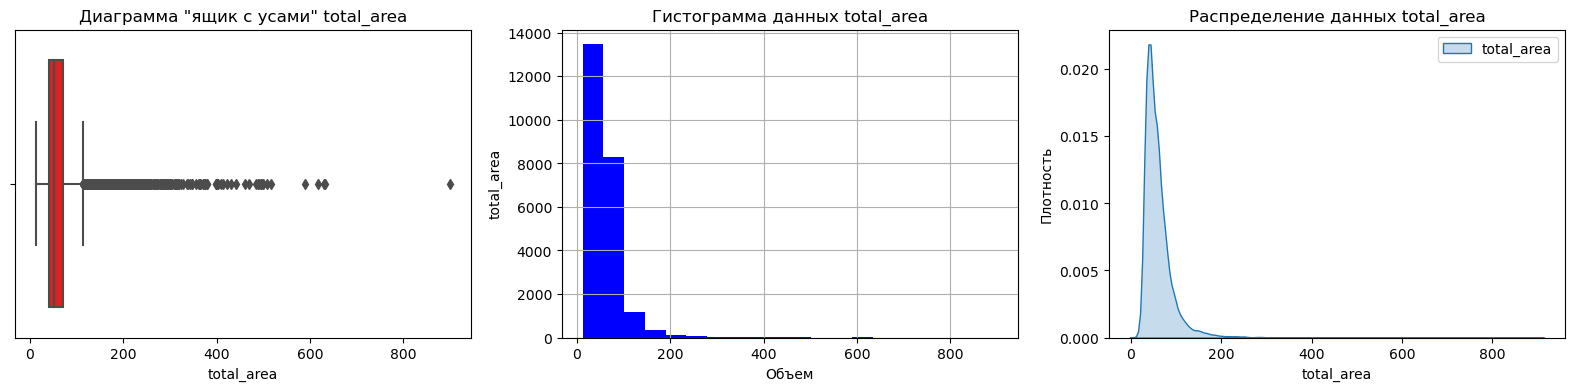

In [53]:
grafik(data, 'total_area')

Вывод: Наиболее высокий спрос на квартиры от 30 до 60 м2, среднее значение площади составляет - 60,5 м2.
Медиана значений - 52 м2. Это значит, что аномалий в данных по общей площади нет. 
Квартиры с площадью от 150 м2 не пользуются спросом.
По диаграмме размаха квартиры с общей площадью от 120 м2 выходят за пределы "усов". И являются выбросами.
При дальнейшем анализе учтем этот факт.

**4.2. Жилая площадь**

count    23565.000000
mean        34.324326
std         21.721235
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64


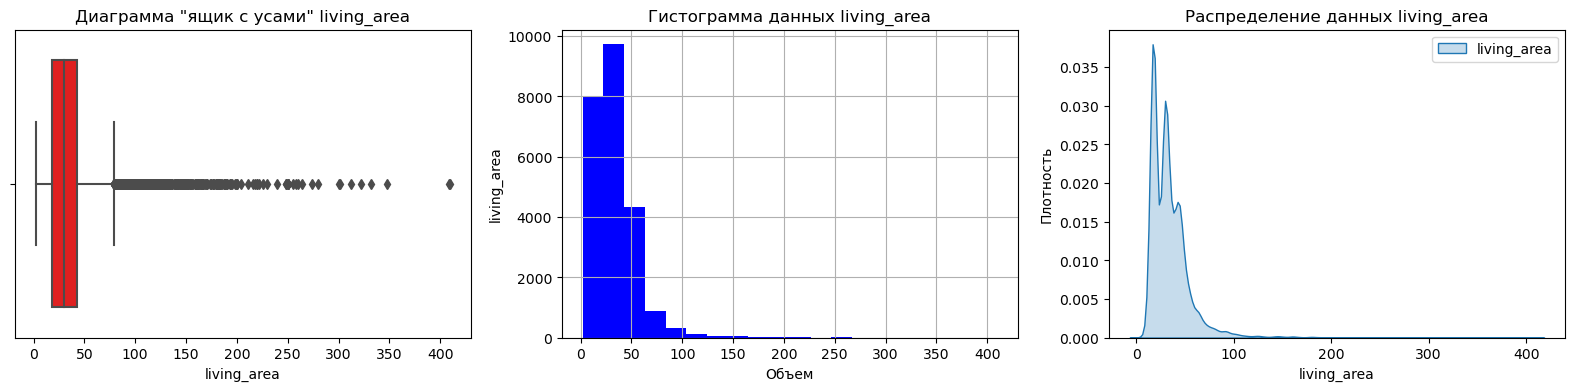

In [54]:
grafik(data, 'living_area')

Вывод: Пик спроса на квартиры с жилой площадью от 12 до 20 м2 (более 5000 квартир), второй пик с жилой площадью 30 - 35 м2 (около 4000 квартир). Среднее значение площади составляет - 34,45 м2.
Медиана значений - 30,5 м2. Это говорит, что аномалий в данных по жилой площади нет. 
Квартиры с жилой площадью от 75 м2 не пользуются спросом.
По диаграмме размаха квартиры с жилой площадью от 80 м2 выходят за пределы "усов". И являются выбросами.
При дальнейшем анализе учтем этот факт.

**4.3. Площадь кухни**

count    23565.000000
mean        10.512020
std          5.668042
min          1.300000
25%          7.300000
50%          9.500000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64


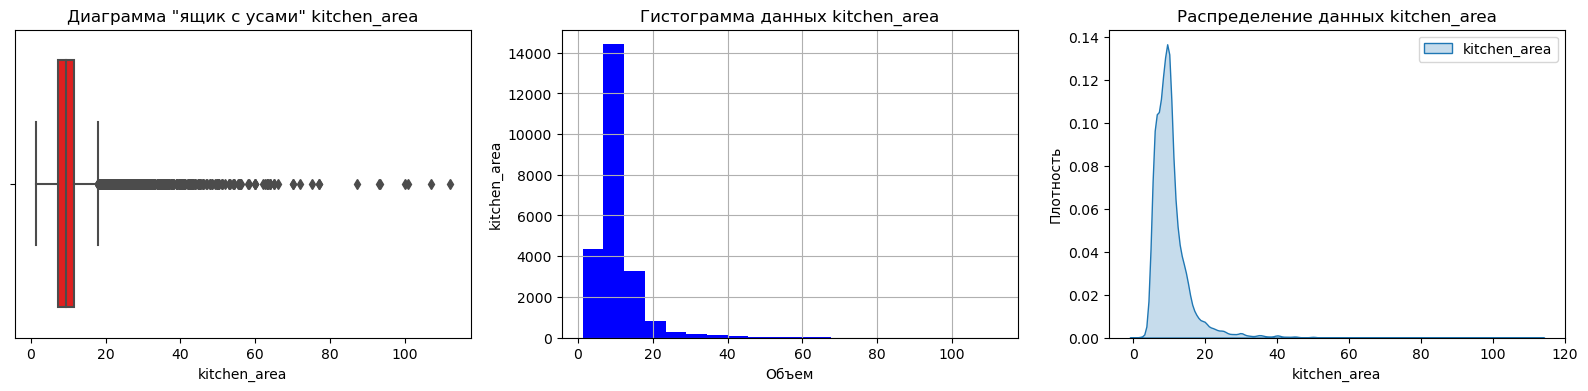

In [55]:
grafik(data, 'kitchen_area')

Вывод: Пик спроса на квартиры с кухонной площадью 8 м2 (более 5500 квартир). Квартиры с площадью кухонь 6 - 15 м2 пользуются наибольшим спросом. Средняя площадь кухонь - 10,45 м2.
Медиана значений - 9,0 м2. Это говорит, что аномалий в данных по площадям кухонь нет. 
Квартиры с площадью кухонь более 20 м2 не пользуются особым спросом.
По диаграмме размаха квартиры с площадью кухонь от 19 м2 выходят за пределы "усов". И являются выбросами.
Учтем этот факт при дальнейших анализах.

**4.4. Цена объекта**

count    23565.000000
mean         6.540112
std         10.910905
min          0.430000
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_new, dtype: float64


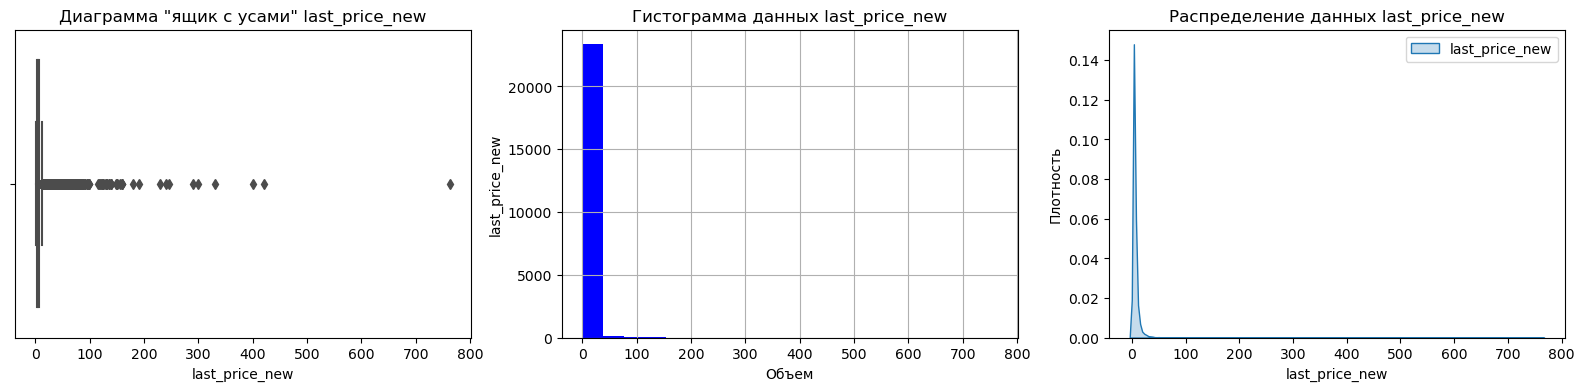

In [56]:
data_db['last_price_new'] = data_db['last_price'] / 1000000
grafik(data, 'last_price_new')

Вывод: Пик спроса на квартиры стоимостью от 500 до 800 тыс.руб. (более 10000 квартир). 
Самые популярные квартиры в диапазоне цен 125 - 1200 тыс.руб. Средняя стоимость квартир - 6,5 млн.руб.
Медиана значений - 4,65 млн.руб. Наблюдается небольшой выброс стоимости в сторону роста цен. 
Квартиры стоимостью от 2 млн.руб. не пользуются особым спросом.
Можно заметить редкие и выбивающиеся значения: максимальная стоимость квартиры - 763 млн. рублей.

**4.5. Количество комнат**

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


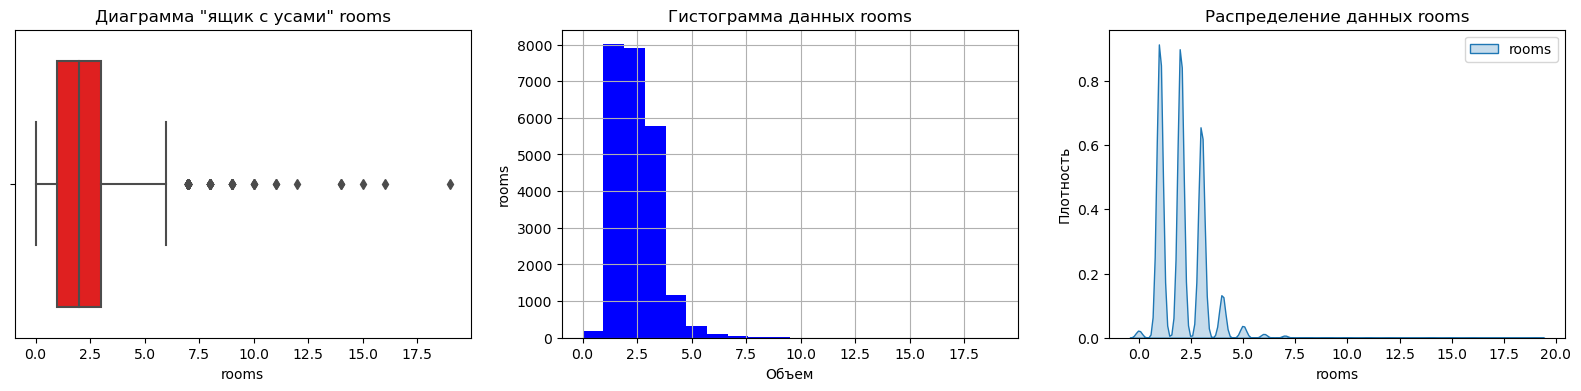

In [57]:
grafik(data, 'rooms')

Вывод: Наиболее популярные однокомнатные, двухкомнатные и трехкомнатные квартиры. 
Средняя количество комнат - 2,08.
Медиана значений - 2,0. Это говорит об отсутствии аномалий в данных по комнатам. 
Многокомнатные квартиры от 4 и выше комнат не пользуются высоким спросом.
Можно заметить редкие и выбивающиеся значения: квартиры более 5 комнат. 

**4.6. Высота потолков**

count    23565.000000
mean         2.671876
std          0.154356
min          1.750000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.000000
Name: ceiling_height, dtype: float64


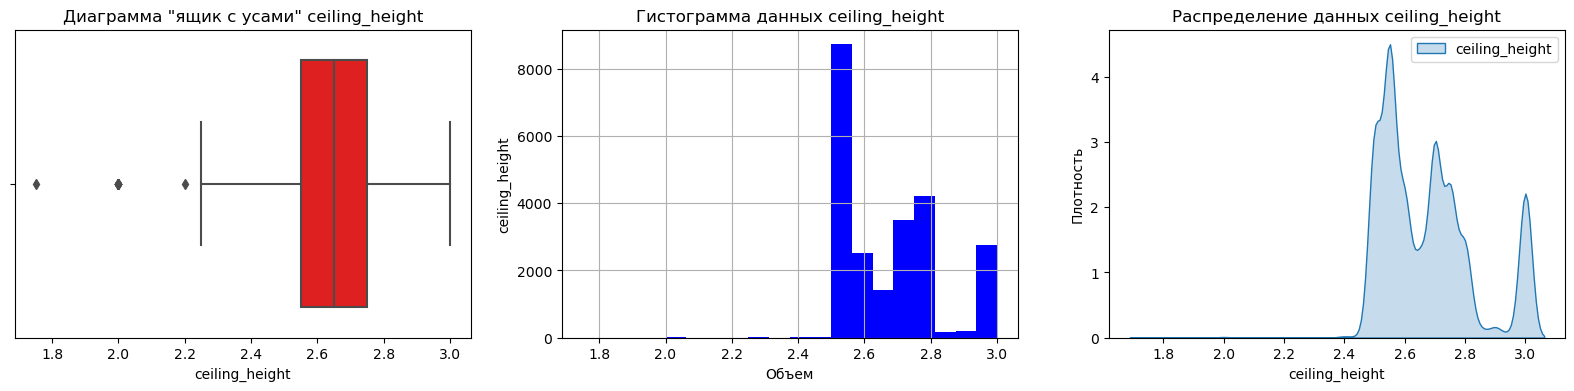

In [58]:
grafik(data, 'ceiling_height')

Вывод: Пиковые значения высот комнат от 2,5 до 2,75 м (более 10000 квартир). 
Средняя высота комнат - 2,70.
Медиана значений - 2,65. Данные по высотам комнат максимально кореллируют. 
Квартиры с высотой потолков от 3,2 м и выше не пользуются спросом.
Даже после некоторых манипуляций с высотами потолков, все равно по диаграмме размаха видно, что высота потолков от 3 метров выходит за пределы "усов" и являются выбросами. Следует учесть операторам данный факт.

**4.7. Этаж квартиры**

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


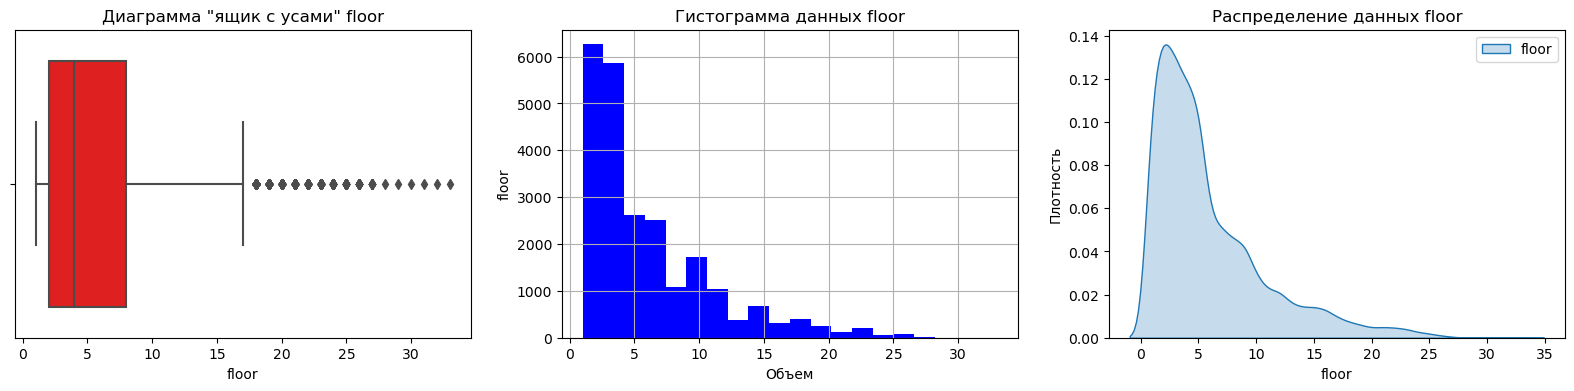

In [59]:
grafik(data, 'floor')

Вывод: Наибольший спрос квартир со 2 по 5 этажи.
Средняя этажность - 5,85.
Медиана значений - 4,00. Аномалий в данных по этажности домов отсутствует.
Квартиры на первых этажах и выше 17 этажа не пользуются высоким спросом.

**4.8. Тип этажей квартиры («первый», «последний», «другой»)**

count    23565.000000
mean         0.407129
std          0.725356
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: floor_group_int, dtype: float64


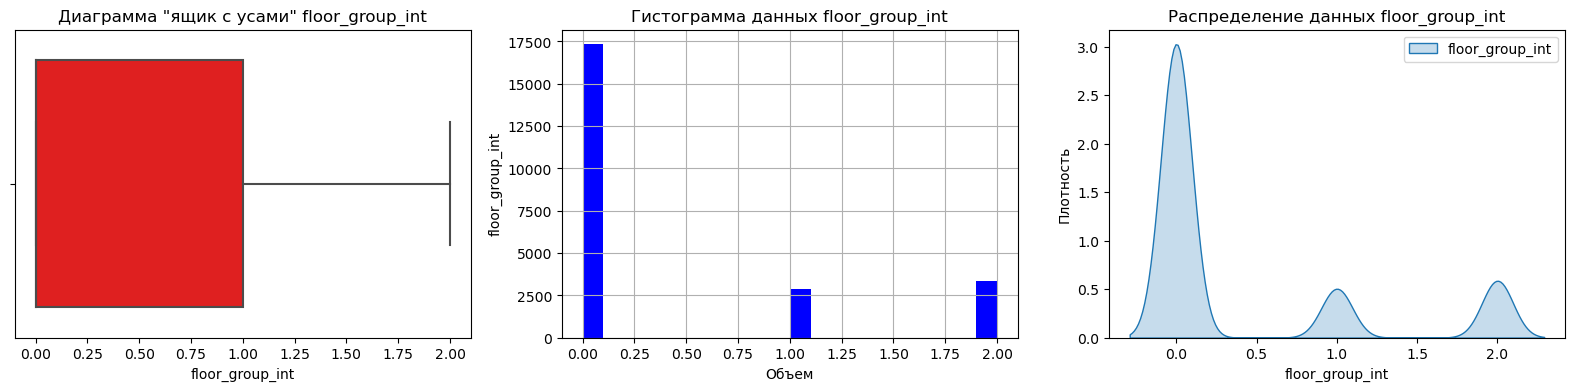

In [60]:
grafik(data, 'floor_group_int')

Вывод: Первый и последние этажи в квартирах самые не популярные.
Стойкий спрос на не крайние квартиры

**4.9. Общее количество этажей в доме**

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


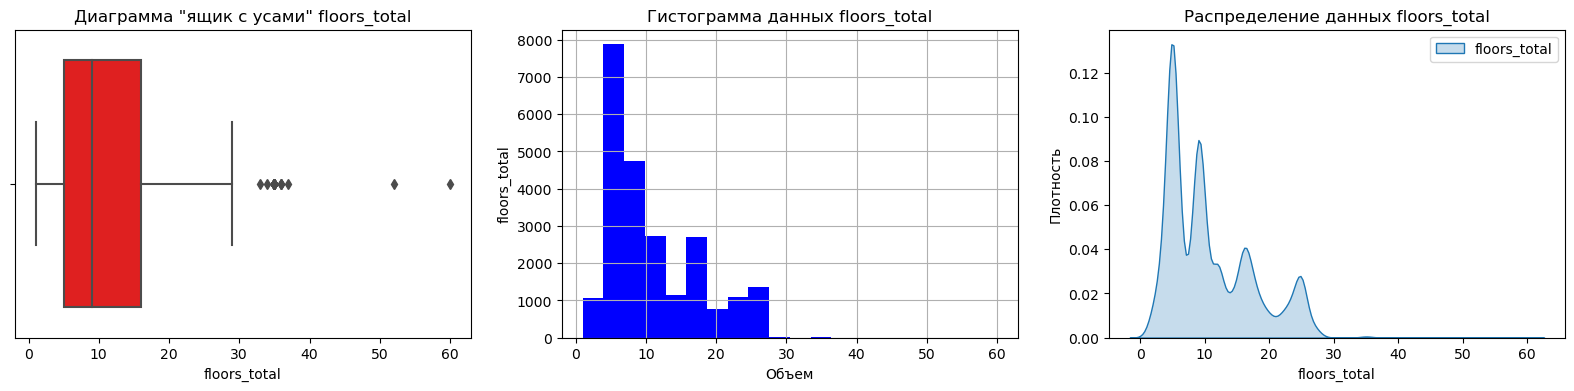

In [61]:
grafik(data, 'floors_total')

Вывод: Наибольший спрос на квартиры в 5-этажках (более 5500 квартир) и 9-этажках (более 3800 квартир)
Спрос неравномерный на дома, но по гистограмме видно, что это от малоэтажных домов до 28-этажных домов.
Остальные высотные дома не пользуются спросом в Ленинградской области судя по всему.
Средняя этажность - 10,62.
Медиана значений - 09,00. 
Аномалий в данных по этажности домов отсутствует.

**4.10. Расстояние до центра города в метрах**

count    23565.000000
mean     26086.901040
std      22990.230249
min        181.000000
25%      10935.000000
50%      14996.000000
75%      34278.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


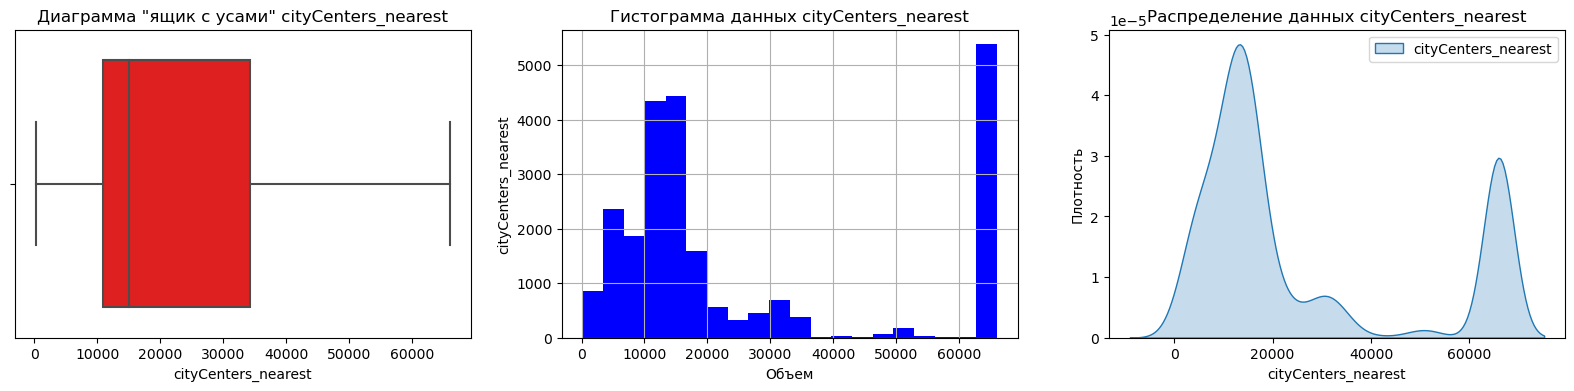

In [62]:
grafik(data, 'cityCenters_nearest')

Настораживают выбросы более 40 км, да и расстояния от 20 км тоже неправдоподобны, хотя и входят в "ящик с усами". При этом надо заметить, что медиана второй квартили Q2 равна 10,9 км. Подозрение! Если это населенные пункты, вроде Ломоносова, то радиус таких городов не более 10 км. Что это за расстояния? Надо выяснить.  

И, если гипотеза ошибки подтвердится, то просто заменим эти расстояния на 2 км. Предположим, что для микрогородов, поселков и деревень расстояния от центра не сильно влияют на ценообразование стоимости жилых помещений. 

Сформируем запросы, которые выведут населенные пункты, сгруппированные по среднему расстоянию до центра.

In [63]:
# Сформируем запрос, какие населенные пункты входят в диапазон расстояниями до центра от 20 до 30 км

a = data_db.query('cityCenters_nearest \
       > 20000') \
       [['cityCenters_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"cityCenters_nearest":"mean"})

# method for each column

index_list = a.index.values.tolist()
index_count = len(a.index )
print('Количество населенных пунктов с расстояниями до центра от 20 км и выше:', index_count, 'нас.пунктов')

Количество населенных пунктов с расстояниями до центра от 20 км и выше: 330 нас.пунктов


In [64]:
# Например сформируем запрос, какие населенные пункты входят в диапазон расстояниями до центра от 20 до 30 км

a = data_db.query('cityCenters_nearest \
       >= 20000 and cityCenters_nearest < 30000') \
       [['cityCenters_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"cityCenters_nearest":"mean"})

index_list = a.index.values.tolist()
index_count = len(a.index )
print('Количество населенных пунктов с расстояниями до центра от 20 км и выше:', index_count, 'нас.пунктов')

display(a)

Количество населенных пунктов с расстояниями до центра от 20 км и выше: 16 нас.пунктов


,cityCenters_nearest
locality_name,
Колпино,29752.571429
Красное Село,28749.140187
Петергоф,29887.000000
Пушкин,26858.500000
Санкт-Петербург,23213.606852
поселок Александровская,27468.000000
поселок Левашово,25727.000000
поселок Лисий Нос,27613.333333
поселок Металлострой,27561.348485


In [65]:
# Сформируем запрос, какие населенные пункты входят в диапазон расстояниями до центра от 30 до 40 км

a = data_db.query('cityCenters_nearest \
       >= 30000 and cityCenters_nearest < 40000') \
       [['cityCenters_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"cityCenters_nearest":"mean"})

index_count = len(a.index )
print('Количество населенных пунктов с расстояниями до центра от 30 до 40 км:', index_count, 'нас.пунктов')

display(a)

Количество населенных пунктов с расстояниями до центра от 30 до 40 км: 12 нас.пунктов


,cityCenters_nearest
locality_name,
Колпино,32287.110410
Красное Село,30793.830508
Ломоносов,36950.666667
Павловск,33206.921053
Петергоф,33147.779874
Пушкин,31707.613793
Сестрорецк,34533.403315
поселок Белоостров,38868.000000
поселок Понтонный,32293.450000


In [66]:
# Сформируем запрос, какие населенные пункты входят в диапазон расстояниями до центра от 40 до 60 км

a = data_db.query('cityCenters_nearest \
       >= 40000 and cityCenters_nearest < 60000') \
       [['cityCenters_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"cityCenters_nearest":"mean"})

index_count = len(a.index )
print('Количество населенных пунктов с расстояниями до центра от 40 до 60 км:', index_count, 'нас.пунктов')

display(a)

Количество населенных пунктов с расстояниями до центра от 40 до 60 км: 7 нас.пунктов


,cityCenters_nearest
locality_name,
Зеленогорск,53893.727273
Красное Село,41663.500000
Кронштадт,49219.843750
Ломоносов,51598.363636
Петергоф,45768.657895
Сестрорецк,42867.000000
поселок Репино,43392.250000


In [67]:
# Сформируем запрос, какие населенные пункты входят в диапазон расстояниями до центра от 60 км

print('Таблица населенных пунктов с расстояниями до центра от 60 км')
a = data_db.query('cityCenters_nearest \
       > 60000')[['cityCenters_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"cityCenters_nearest":"mean"})


index_list = a.index.values.tolist()
index_count = len(a.index )
print('Количество населенные пунктов с расстояниями до центра от 20 км и выше:', index_count, 'нас.пунктов')
display(a)

Таблица населенных пунктов с расстояниями до центра от 60 км
Количество населенные пунктов с расстояниями до центра от 20 км и выше: 307 нас.пунктов


,cityCenters_nearest
locality_name,
Бокситогорск,65968.0
Волосово,65968.0
Волхов,65968.0
Всеволожск,65968.0
Выборг,65968.0
...,...
село Путилово,65968.0
село Рождествено,65968.0
село Русско-Высоцкое,65968.0


Вывод: Очевидно, что все расстояния от центра выше 20 км - это какие-то ошибки. Протяжённость города Санкт-Петербург с востока на запад — 25 км, с севера на юг — 52 км, с северо-запада на юго-восток — около 90 км. Допустим, что минимальное расстояние до центра самого крупного города примерно 15 км. Расстояния до центра населенных пунктов свыше 15 км - это явная аномалия, которую следует исправить. И по всем этим населенным пунктам расстояние установим равным 0, чтобы не нарушить общий фон данных. На данном этапе исследования, мне кажется достаточен такой подход, иначе придется анализировать все 100 населенных пунктов по их диаметру, вычислять среднее расстояния до центра по каждому населенному пункту и вносить в датасет. Это трудоемко и неоправданно.

In [68]:
# Чтобы не терять прежних данных, создадим столбец cityCenters_nearest_new
# и реализуем алгоримт замены всех расстояний от центра свыше 15 км на 0 км. 

data_db['cityCenters_nearest_new'] = data_db['cityCenters_nearest']
data_db.loc[(data_db['cityCenters_nearest_new'] > 15000), 'cityCenters_nearest_new'] = 0
display(data_db[['cityCenters_nearest', 'cityCenters_nearest_new']])


,cityCenters_nearest,cityCenters_nearest_new
0,16028.0,0.0
1,18603.0,0.0
2,13933.0,13933.0
3,6800.0,6800.0
4,8098.0,8098.0
...,...,...
23694,4232.0,4232.0
23695,65968.0,0.0
23696,65968.0,0.0
23697,10364.0,10364.0


Еще раз проверяем расстояния по гистограмме и диаграмме размаха

count    23565.000000
mean      4877.512031
std       5599.340891
min          0.000000
25%          0.000000
50%        215.000000
75%      10938.000000
max      14998.000000
Name: cityCenters_nearest_new, dtype: float64


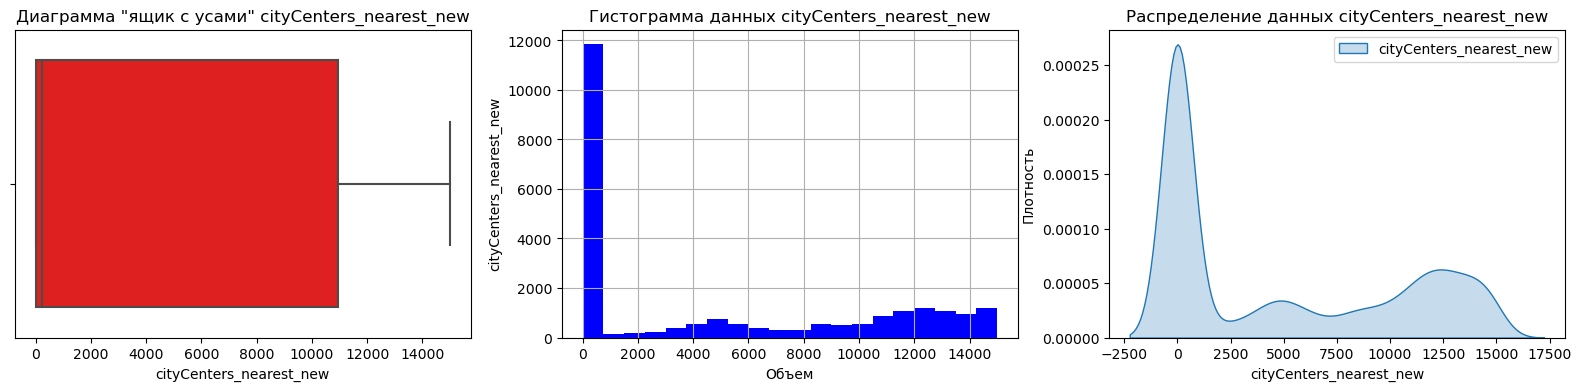

In [69]:
grafik(data, 'cityCenters_nearest_new')

Вывод: В обработанной выборке стандартное отклонение велико от среднего.
Среднее расстояние - 4882,6.
Медиана значений - 436,00. 
Эта явная аномалия получилась после преобразования всех расстояний свыше 15 км в 0. Поэтому данным пиком в 0 пренебрежем.
Тем более, что межквартильный размах теперь получился в пределах нормы.

После приведения расстояний до центра населенных пунктов к более правдоподобным данным, оказалось, что наблюдается прямая зависимость расстояния роста спроса от расстояния квартир до центра. 
Люди ищут спальные районы.

**4.11. Расстояние до ближайшего аэропорта**

count    23565.000000
mean     41751.799873
std      26002.955794
min          0.000000
25%      21166.000000
50%      33563.000000
75%      54061.000000
max      84869.000000
Name: airports_nearest, dtype: float64


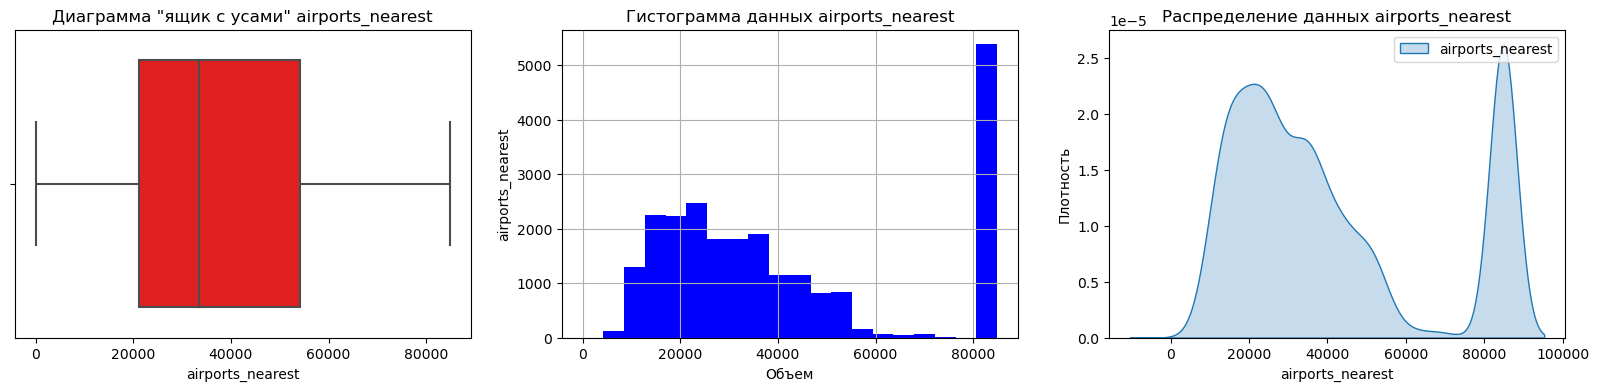

In [70]:
grafik(data, 'airports_nearest')

В обработанной выборке стандартное отклонение в пределах допустимого.
Среднее расстояние - 41766,67.
Медиана значений - 33557,00. 
Проверим выброс 84869 м.

In [71]:
# Сформируем запрос, какие населенные пункты входят в диапазон 84869 м

print('Таблица населенных пунктов с расстояниями до аэропорта')
a = data_db.query('airports_nearest \
       > 60000')[['airports_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"airports_nearest":"mean"})

display(a)

Таблица населенных пунктов с расстояниями до аэропорта


,airports_nearest
locality_name,
Бокситогорск,84869.0
Волосово,84869.0
Волхов,84869.0
Всеволожск,84869.0
Выборг,84869.0
...,...
село Путилово,84869.0
село Рождествено,84869.0
село Русско-Высоцкое,84869.0


Повторно выведем распределение расстояний до аэропорта, обрезав выброс 84869 м

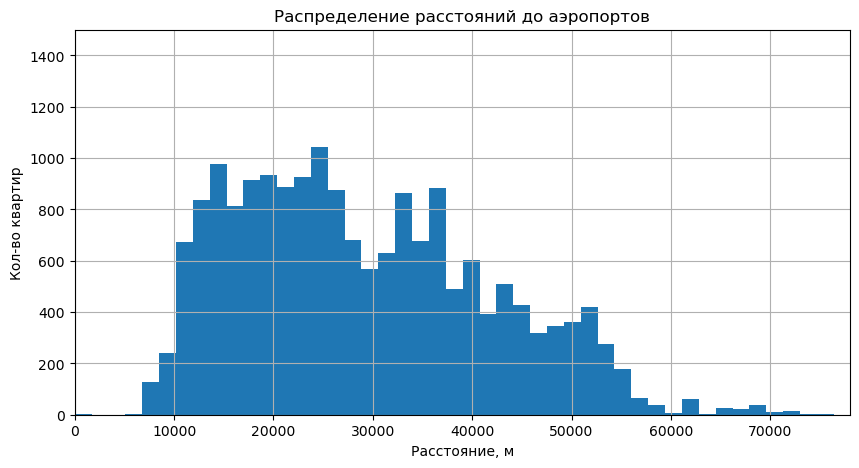

In [72]:
# Гистограмма для столбца расстояний до ближайшего парка airports_nearest  

data_db.hist('airports_nearest', bins=50, figsize = (10,5))
plt.title('Распределение расстояний до аэропортов')
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во квартир')
plt.xlim((0, 78000))
plt.ylim((0, 1500))
plt.show()

Вывод: Выброс 84869 метров внесен от балды. Ясно, что ориентир - это аэропорт Пулково. Поэтому не станем обрабатывать этот признак, тем более он нам не понадобиться при построении модели. 

По диаграмме видно, что людей менее всего интересуют квартиры ближе 10 км от аэропортов. И дальше 50 км от аэропортов. Видимо расстояния от 50 км до аэропорта - это удаленные населенные пункты с явно выраженным меньшим спросом на квартиры.

**4.12. Расстояние до ближайшего парка**

count    23565.000000
mean      2172.192659
std       1302.940265
min          1.000000
25%        590.000000
50%       3190.000000
75%       3190.000000
max       3190.000000
Name: parks_nearest, dtype: float64


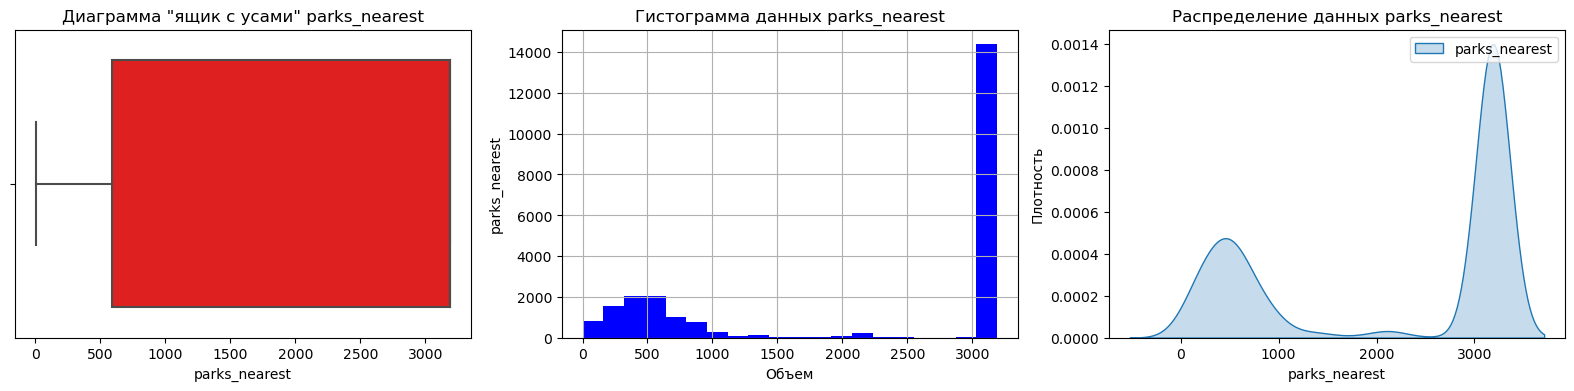

In [73]:
grafik(data, 'parks_nearest')

В обработанной выборке стандартное отклонение в пределах допустимого.
Среднее расстояние - 41766,67.
Медиана значений - 33557,00. 
Проверим выброс 3190 м.

In [74]:
# Сформируем запрос, какие населенные пункты входят в диапазон 3190 м

print('Таблица населенных пунктов с расстояниями до ближайшего парка от 2 км')
a = data_db.query('parks_nearest \
       > 2000')[['parks_nearest', 'locality_name']] \
       .groupby('locality_name').agg({"parks_nearest":"mean"})

display(a)

Таблица населенных пунктов с расстояниями до ближайшего парка от 2 км


,parks_nearest
locality_name,
Бокситогорск,3190.0
Волосово,3190.0
Волхов,3190.0
Всеволожск,3190.0
Выборг,3190.0
...,...
село Путилово,3190.0
село Рождествено,3190.0
село Русско-Высоцкое,3190.0


Повторно выведем диаграмму по расстояниям до ближайшего парка, обрезав выбросы от 3190 м

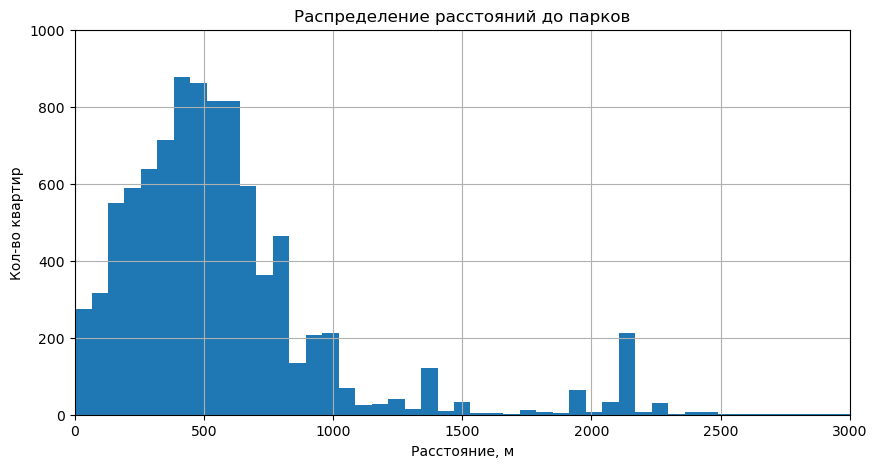

In [75]:
# Гистограмма для столбца расстояний до ближайшего парка parks_nearest  

data_db.hist('parks_nearest', bins=50, figsize = (10,5))
plt.title('Распределение расстояний до парков')
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во квартир')
plt.xlim((0, 3000))
plt.ylim((0, 1000))
plt.show()

In [76]:
print('Таблица населенных пунктов с расстояниями до ближайшего парка от 2100 до 2300 м')
#a = data_db.query('parks_nearest \
#       >= 2100 and parks_nearest < 2300') \
#       [['parks_nearest', 'locality_name']]

b = data_db[(data_db['parks_nearest'] >= 2100) \
        & (data_db['parks_nearest'] < 2300)] \
        [['parks_nearest', 'locality_name']]

#display(a.head())
display(b.head())

Таблица населенных пунктов с расстояниями до ближайшего парка от 2100 до 2300 м


,parks_nearest,locality_name
33,2131.0,Колпино
323,2295.0,Санкт-Петербург
343,2131.0,Колпино
438,2295.0,Санкт-Петербург
446,2131.0,Колпино


Вывод: Выброс 3190 метров видимо тоже внесен на автомате. Его обрабатывать не станем, т.к. процесс трудоемкий и неизвестно, какие реальные расстояния до ближайших парков по каждому населенному пункту. Минимальные значения совпадают с текущими значениями, а то можно было бы подкорректировать цифры. Оставим все без изменения.

По диаграмме видно, что людей интересуют квартиры, где ближайшие парки находятся в пределах 300 - 700 метров от квартир.
Наблюдаются пики в 2100 метров, которые могут свидетельствовать о более крупном городе, как СПб. Что подтверждается дополнительным исследованием. Колпино примыкает к СПб и можно тоже считать это расстояние за правду.

**4.13. День и месяц публикации объявления**

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_weekday, dtype: float64


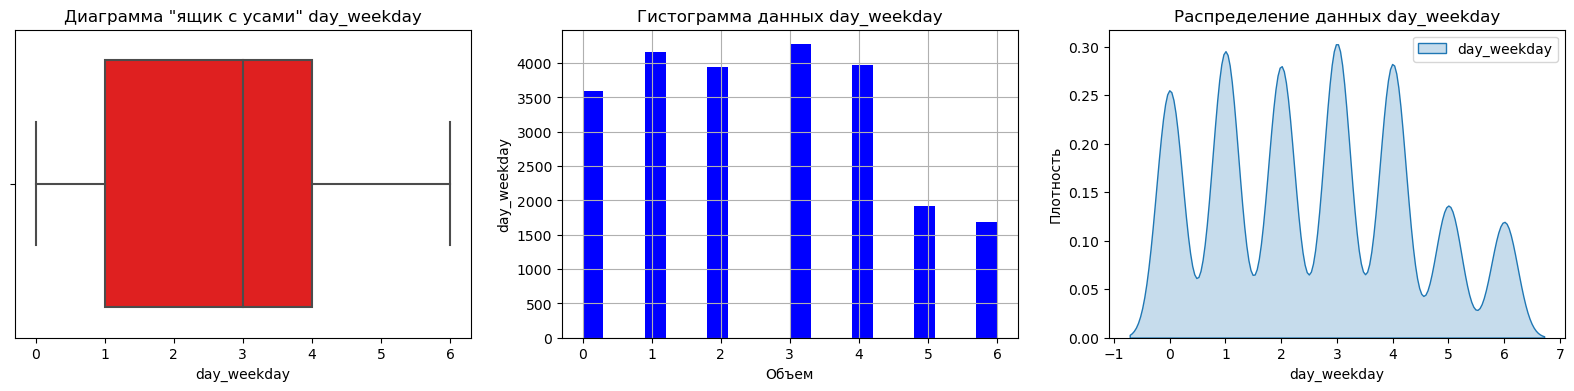

In [77]:
grafik(data, 'day_weekday')

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: day_month, dtype: float64


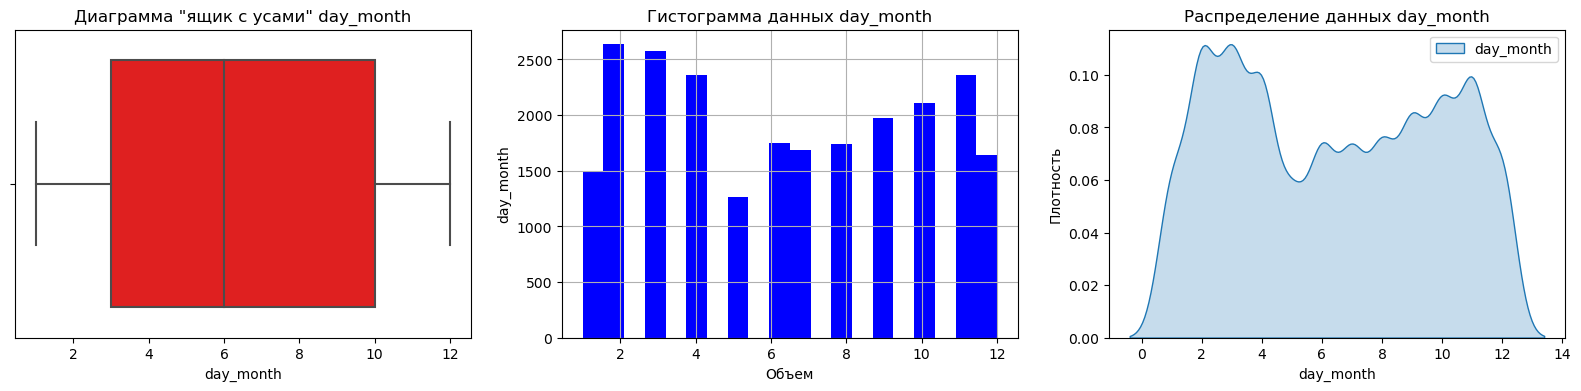

In [78]:
grafik(data, 'day_month')

Вывод по дням недели: Наибольший спрос на квартиры с понедельника по четверг. В пятницу и субботу спрос сокращается вдвое.
В воскресенье нет публикаций. Средняя по дням недели - 2,56. Медиана значений - 3,00. Аномалий в данных нет.

Вывод по месяцам публикаций: Наибольший спрос на квартиры с февраля по март и с сентября по ноябрь. В остальные месяцы спрос сокращается вдвое. В январе вообще нет публикаций. Средняя по месяцам публикаций - 6,39. Медиана значений - 6,00. Аномалий в данных нет.

count    23565.000000
mean      2017.371016
std          1.037393
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: day_year, dtype: float64


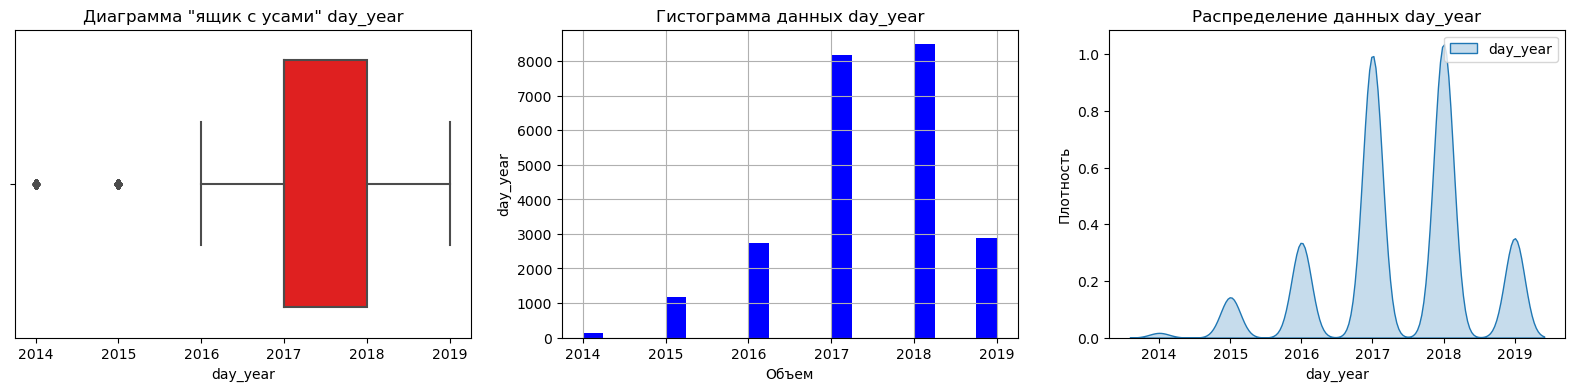

In [79]:
grafik(data, 'day_year')

**4.14. Как быстро продавались квартиры (столбец days_exposition)**

*	Построим гистограмму.
*	Посчитаем среднее и медиану.
*	В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64


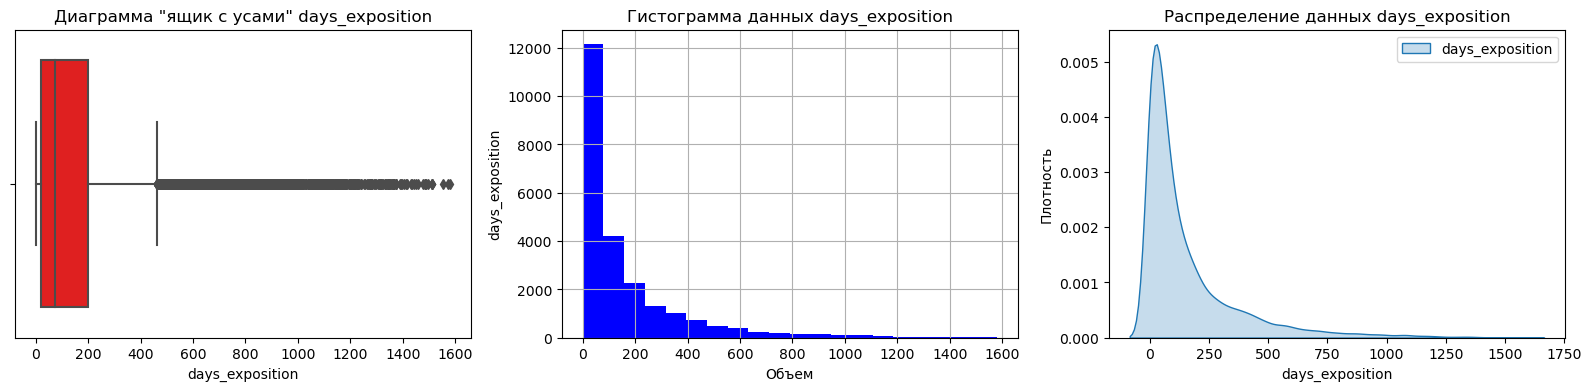

In [80]:
grafik(data, 'days_exposition')

Среднее время продажи - 157 дней (5 месяцев), значение медианы составляет 74 дня (2,5 месяца).
Из гистограммы видно, что обычно объявления размещаются на период до 3 месяцев (быстрые продажи), 
однако есть много объявлений со сроками продажи от 6 месяцев. Необычно долгие продажи лежат в пределах от 200 до 500 дней полугода до 1,5 лет. 

По диаграмме размаха видно, что имеются выбивающиеся значения за пределами "усов", начинаяч с 500 дней, при этом максимальное время продажи квартиры составляет 1 580 дней (более 4 лет).

**4.15. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Изучите, зависит ли цена от:
*	общей площади;
*	жилой площади;
*	площади кухни;
*	количества комнат;
*	этажа, на котором расположена квартира (первый, последний, другой);
*	даты размещения (день недели, месяц, год).

*4.15.1.* Рассмотрим, какие факторы больше всего влияют на стоимость квартиры с помощью коэффициентов корреляции.
Найдем коэффициент Пирсона (корелляции) методом corr() для стоимость квартиры и общей площади.

In [81]:
# Коэффициент корелляции для total_area
print('Минимальная общая площадь: ', data_db['total_area'].min(), 'м2')
print('Максимальная общая площадь: ', data_db['total_area'].max(), 'м2')
print('Коэффициент корелляции между last_price и total_area: ', data_db['last_price'].corr(data_db['total_area']))

Минимальная общая площадь:  12.0 м2
Максимальная общая площадь:  900.0 м2
Коэффициент корелляции между last_price и total_area:  0.6536299320380282


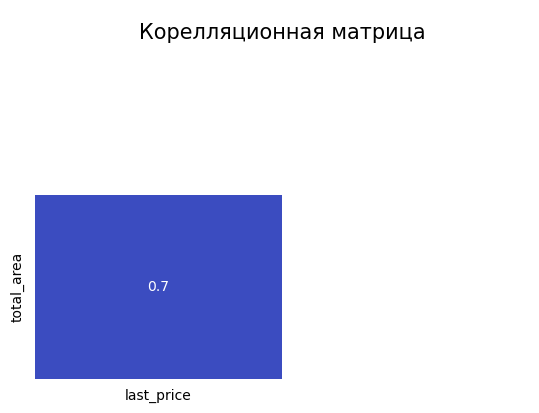

In [82]:
plot_corr_heatmap(data[['last_price', 'total_area']].corr(), 'Корелляционная матрица')

Корреляция в 0.65 говорит о наличии связи, однако не слишком сильной. Выходит, рост общей площади сопровождается ростом в стоимости квартиры, но не так выраженно и не всегда. 

[Text(0.5, 1.0, 'Зависимость стоимости жилья от общей площади')]

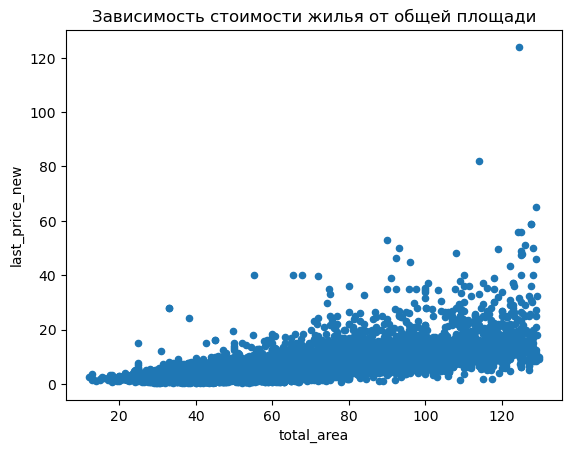

In [83]:
# Оценим зависимость стоимости квартир от общей площади
#data_db.query('total_area<130').pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.3)
data_db.query('total_area<130') \
  .plot(x='total_area', y='last_price_new', \
   kind='scatter').set(title='Зависимость стоимости жилья от общей площади')

В целом диаграмма рассеяния подтверждает коэффициент корелляции и незначительную прямую связь между общей площадью квартиры и полной её стоимости. Чем выше общая площадь, тем выше стоимость самой квартиры.

*4.15.2.* Найдем коэффициент Пирсона (корелляции) методом corr() для стоимость квартиры и жилой площади.

In [84]:
# Коэффициент корелляции для living_area
print('Минимальная жилая площадь: ', data_db['living_area'].min(), 'м2')
print('Максимальная жилая площадь: ', data_db['living_area'].max(), 'м2')
print('Коэффициент корелляции между last_price и living_area: ', data_db['last_price'].corr(data_db['living_area']))

Минимальная жилая площадь:  2.0 м2
Максимальная жилая площадь:  409.7 м2
Коэффициент корелляции между last_price и living_area:  0.5560549810894561


Корреляция в 0.556 говорит о наличии связи, однако не сильной. Даже меньшей, чем от общей площади. 
Выходит, рост жилой площади сопровождается небольшим ростом в стоимости квартиры. 

[Text(0.5, 1.0, 'Зависимость стоимости жилья от жилой площади')]

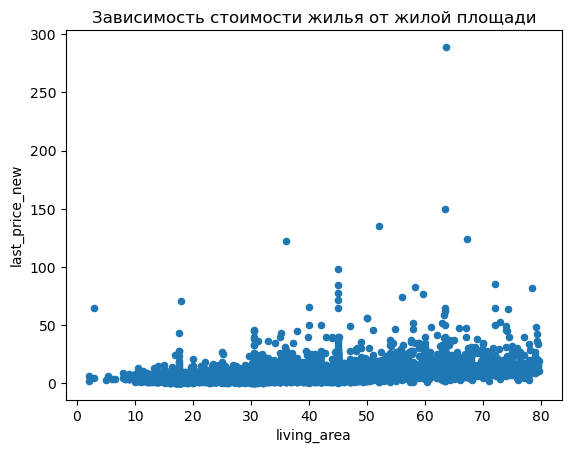

In [85]:
# Оценим зависимость стоимости квартир от жилой площади. 
# Ограничимся жилой площадью 80 м2, которая входит в пределы
# диаграммы интерквартильного размаха

data_db.query('living_area<80') \
.plot(x='living_area', y='last_price_new', \
   kind='scatter').set(title='Зависимость стоимости жилья от жилой площади')

В целом диаграмма рассеяния подтверждает коэффициент корелляции и еще меньшую прямую связь между жилой площадью квартиры и полной её стоимости, чем в предыдущем сравнении с общей площадью.

*4.15.3.* Найдем коэффициент Пирсона (корелляции) методом corr() для стоимость квартиры и площади кухни.

In [86]:
# Коэффициент корелляции для kitchen_area
print('Минимальная площадь кухни: ', data_db['kitchen_area'].min(), 'м2')
print('Максимальная площадь кухни: ', data_db['kitchen_area'].max(), 'м2')
print('Коэффициент корелляции между last_price и kitchen_area: ', data_db['last_price'].corr(data_db['kitchen_area']))

Минимальная площадь кухни:  1.3 м2
Максимальная площадь кухни:  112.0 м2
Коэффициент корелляции между last_price и kitchen_area:  0.4675565320614788


Корреляция в 0.454 говорит о еще меньшей связи между last_price и kitchen_area. 

[Text(0.5, 1.0, 'Зависимость стоимости жилья от площади кухни')]

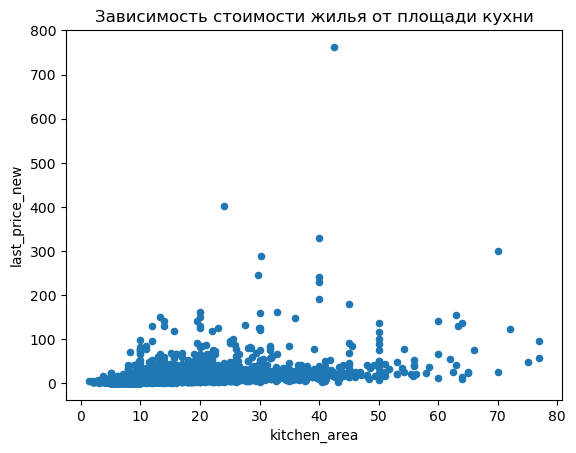

In [87]:
# Оценим зависимость стоимости квартир от площади кухонь. 

data_db.query('kitchen_area<80') \
  .plot(x='kitchen_area', y='last_price_new', \
   kind='scatter').set(title='Зависимость стоимости жилья от площади кухни')

В целом диаграмма рассеяния подтверждает коэффициент корелляции. Связь наблюдается для квартир с площадью кухонь до 50 м2. Квартиры с площадью кухонь более 50 м2 редкость.

*4.15.4.* Найдем коэффициент Пирсона (корелляции) методом corr() для стоимость квартиры и количеством комнат.

In [88]:
# Коэффициент корелляции для rooms
print('Минимальное кол-во комнат: ', data_db['rooms'].min())
print('Максимальное кол-во комнат: ', data_db['rooms'].max())
print('Коэффициент корелляции между last_price и rooms: ', data_db['last_price'].corr(data_db['rooms']))

Минимальное кол-во комнат:  0
Максимальное кол-во комнат:  19
Коэффициент корелляции между last_price и rooms:  0.3631911971850148


[Text(0.5, 1.0, 'Зависимость стоимости жилья от кол-ва комнат')]

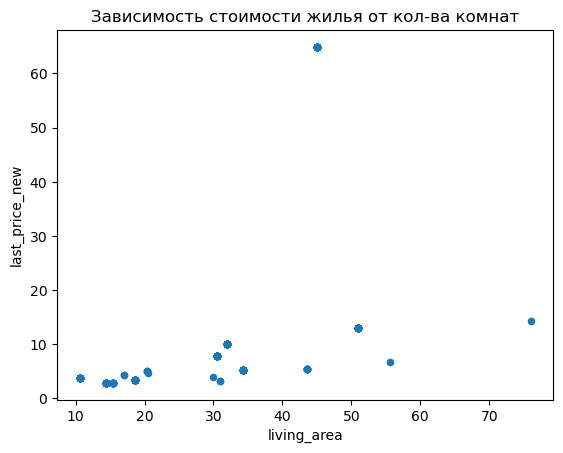

In [89]:
# Оценим зависимость стоимости квартир от кол-ва комнат. 

data_db.query('rooms') \
.plot(x='living_area', y='last_price_new', \
   kind='scatter').set(title='Зависимость стоимости жилья от кол-ва комнат')

В целом диаграмма рассеяния подтверждает коэффициент корелляции. Чем больше комнат, тем выше стоимость квартиры. Эта теденция сохраняется от одно- до 7-комнатных квартир. Затем зависимость станомится нулевой.

Исправил код, заработало.

*4.15.5.* Найдем коэффициент Пирсона (корелляции) методом corr() для стоимость квартиры и этажем, на котором расположена квартира (первый, последний, другой).

In [90]:
# Коэффициент корелляции для floor_group
print('Коэффициент корелляции между last_price и floor_group_int: ', data_db['last_price'].corr(data_db['floor_group_int']))

Коэффициент корелляции между last_price и floor_group_int:  0.001657194599701266


[Text(0.5, 1.0, 'Зависимость стоимости жилья от этажа')]

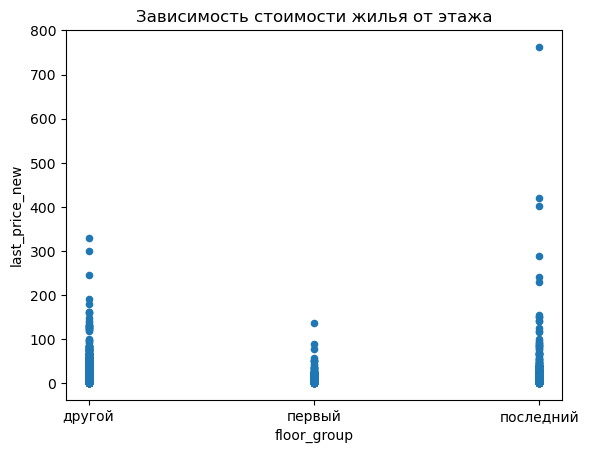

In [91]:
# Оценим зависимость стоимости квартир от этажа, на котором расположена квартира (первый, последний, другой). 

data_db.plot(x='floor_group', y='last_price_new', \
   kind='scatter').set(title='Зависимость стоимости жилья от этажа')

Квартиры на первом и последнем этаже дешевле, чем на других этажах. При этом на первом этаже стоимость квартир значительно ниже, чем на последнем. На последнем этаже при этом наблюдается всплеск стоимости, в том числе и за счет выброса в стоимости 763 мин.руб.

*4.15.5.* Найдем коэффициент Пирсона (корелляции) методом corr() для стоимости квартиры и даты размещения (день недели, месяц, год)

In [92]:
# Коэффициент корелляции для day_weekday, day_month, day_year
print('Коэффициент корелляции между last_price и day_weekday: ', data_db['last_price'].corr(data_db['day_weekday']))
print('Коэффициент корелляции между last_price и day_month: ', data_db['last_price'].corr(data_db['day_month']))
print('Коэффициент корелляции между last_price и day_year: ', data_db['last_price'].corr(data_db['day_year']))

Коэффициент корелляции между last_price и day_weekday:  0.0013553479211845438
Коэффициент корелляции между last_price и day_month:  0.002721124494489407
Коэффициент корелляции между last_price и day_year:  -0.04285646346854544


[Text(0.5, 1.0, 'Зависимость стоимости квартир от дня недели публикации')]

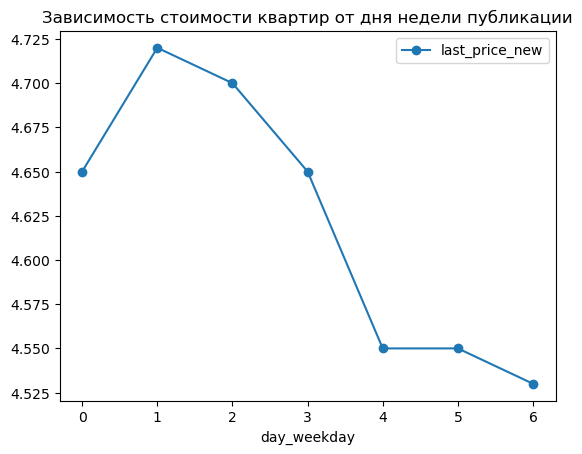

In [93]:
# Оценим зависимость стоимости квартир от day_weekday 
# диаграммам рассеивания

data_db.pivot_table(index='day_weekday', \
    values='last_price_new', aggfunc='median')\
    .plot(style='o-') \
    .set(title='Зависимость стоимости квартир от дня недели публикации')

Наибольшая стоимость квартиры у объявлений, выставленных в начале неделе, наименьшая - в конце недели.
Хотя по корелляции зависимость между day_weekday и last_price практически нулевая

[Text(0.5, 1.0, 'Зависимость стоимости квартир от месяца публикации')]

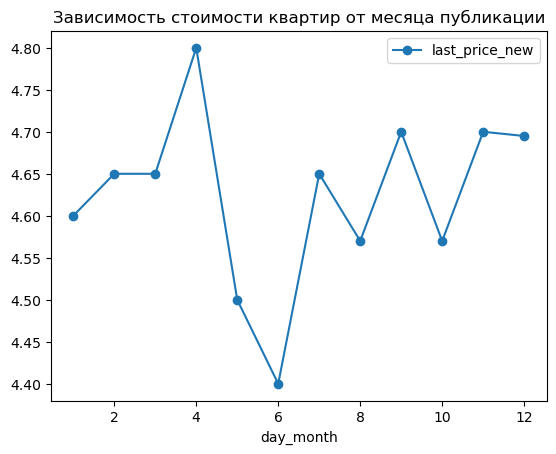

In [94]:
# Оценим зависимость стоимости квартир от day_month по 
# диаграммам рассеивания

data_db.pivot_table(index='day_month', \
    values='last_price_new', aggfunc='median')\
    .plot(style='o-') \
    .set(title='Зависимость стоимости квартир от месяца публикации')

Наибольшее стоимость квартир у объявлений, выставленных в апреле и сентябре, наименьшая - в мае и июне.
Корелляционная зависимость между day_month и last_price практически нулевая.

[Text(0.5, 1.0, 'Зависимость стоимости квартир от года публикации')]

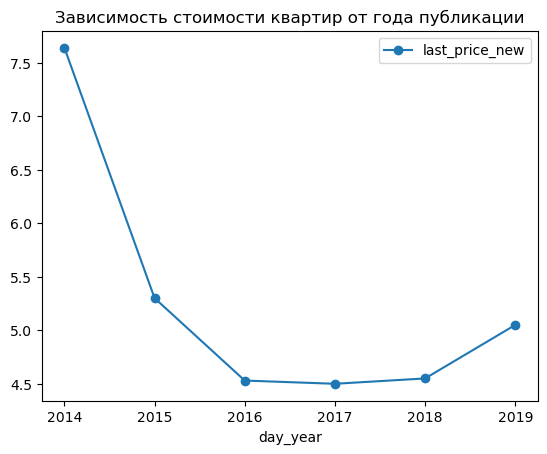

In [95]:
# Оценим зависимость стоимости квартир от day_year по 
# диаграммам рассеивания

data_db.pivot_table(index='day_year', \
    values='last_price_new', aggfunc='median')\
   .plot(style='o-') \
   .set(title='Зависимость стоимости квартир от года публикации')

Самая высокая стоимость квартир у объявлений, выставленных в 2014 году, начиная с 2016 года стоимость квартир резко упали  стала расти только с 2019 года. Корелляционная зависимость между day_year и last_price практически нулевая.

**4.16. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

[Text(0.5, 1.0, 'Средняя цена 1 м2 жилья по 10 топ-городам')]

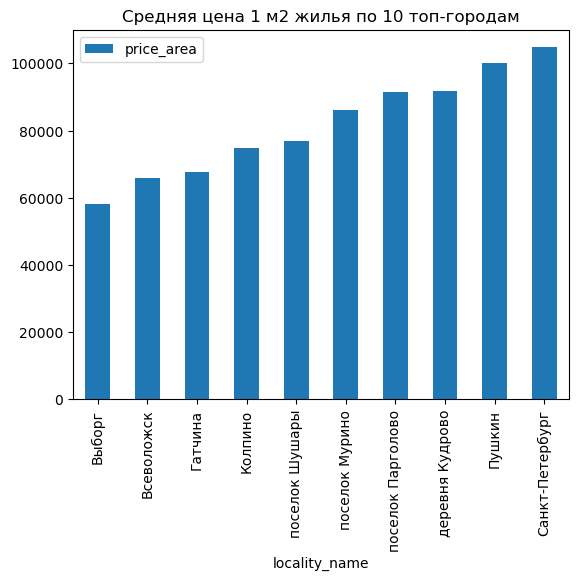

In [96]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
top_city = data_db['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(top_city)

# И посчитаем среднюю цену м2 в этих населённых пунктах, 
# выделим пункты с самой высокой и низкой стоимостью жилья.
data_db.query('locality_name in @top_city.index'). \
   pivot_table(index='locality_name', values='price_area', \
   aggfunc='median').sort_values('price_area').plot(kind='bar')\
   .set(title='Средняя цена 1 м2 жилья по 10 топ-городам')

Вывод: Санкт-Петербург и Пушкин - самой высокой стоимостью жилья.
Выборг и Всеволожск - с самой низкой стоимостью.

**4.17. Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города**

Создадим в таблице data_db столбец с расстоянием до центра в километрах и округлим его до целых int

In [97]:
data_db['cityCenters_km'] = (data_db['cityCenters_nearest_new']/1000).astype(int)
#data.head(10)

In [98]:
# Далее посчитаем среднюю цену для каждого километра.
data_db['price_km'] = data_db['last_price'] / data_db['cityCenters_km'].astype(int)
#data.head(10)

[Text(0.5, 1.0, 'Зависимость средней цены километрах от удалённости от центра')]

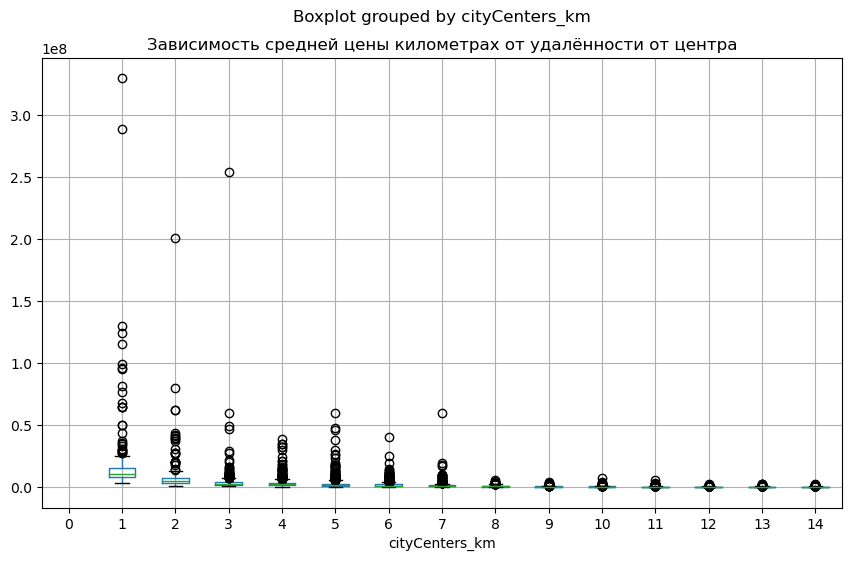

In [99]:
# Построим график зависимости средней цены километра от удалённости от центра

data_db.boxplot('price_km', by='cityCenters_km', figsize=(10,6)) \
.set(title='Зависимость средней цены километрах от удалённости от центра')

Максимальная цена квартиры лежит в радиусе 5 км от центра, затем снижается до 11 км.
Далее средняя цена каждого километра практически не меняется.

<div style="border:solid green 2px; padding: 20px">

**Подведем итоги по разделу 4. Исследовательский анализ данных** 

1. Санкт-Петербург и Пушкин занимают нишу самых дорогих квартир в Ленинградской области. Самая низкая стоимость жилья в Выборге и Всеволожске. Пик стоимости квартир приходился на 2014 год, затем цены начиная с 2016 года упали почти вдвое и стали возвращаться обратно с 2019 года.
2. Пик стоимости квартир у объявлений, выставляемых в начале недели, к концу недели спрос на жилье снижается. Наибольший спрос на квартиры с понедельника по четверг. В пятницу и субботу спрос сокращается вдвое. При этом самая высокая стоимость квартир выявлена у объявлений, выставленных в апреле и сентябре. Самый низкий спрос на жилье в мае - июне. В январе вообще нет продаж. 
Наибольший спрос на квартиры с февраля по март и с сентября по ноябрь. В остальные месяцы спрос на жилье сокращается вдвое.
3. Быстрыми продажами жилья можно считать продажи в пределах 3 месяцев. При этом в наличии много жилья со сроками продажи от 5 месяцев - необычно долгие продажи.
4. Относительно технических характеристик на жилье спрос распределился следующим образом:
- Квартиры на первом и последнем этаже дешевле, чем на других этажах. При этом на первом этаже стоимость квартир значительно ниже, чем на последнем. 
- Наибольший спрос на квартиры в стадратных домах: 5-этажках (более 5500 квартир) и 9-этажках (более 3800 квартир).
- Наблюдается прямая связь между стоимостью жилья, числом комнат, общей и жилой площадью. Чем больше комнат и площадь жилья, тем выше стоимость квартиры. И эта тенденция сохраняется вплоть до 7-комнатных квартир. 
- Наибольший спрос на жилье с высотами потолков от 2,5 до 2,75 м (более 10000 квартир).
5. Относительно географического расположения спрос на жилье распределился следующим образом:
- Чем дальше жилье от центра населенного пункта, тем выше спрос. Люди ищут спальные районы. При этом максимальная стоимость жилья лежит в радиусе до 5 км от центра и плавно снижается к отметке 11 км.
- Людей менее всего интересуют квартиры рядом с аэропортами в радиусе 10 км, а также выявлена закономерность, что на расстоянии далее 50 км от аэропортов спрос также снижается резко. Видимо это удаленные от СПб населенные пункты с явно выраженным меньшим спросом на жилье.
- Людей интересует жилье с благоустроенной инфраструктурой. Наивысший спрос на жилье с парками в пределах 300 - 700 метров от жилья.

### Общий вывод

<div style="border:solid green 2px; padding: 20px">

**Общий вывод при проведении исследования продажи жилья в Ленинградской области** 

На стоимость жилья прямо влияет несколько исследованных категорий показателей: географические, технические и временные. 
- Географические. Расстояние до центра напрямую влияет на стоимость квартиры и на спрос. Чем ближе к центру, тем жилье дороже, но при этом и спрос ниже. Нибольший спрос на жилье в спальных районах вдали от центра, вдали от аэропортов. При этом на спрос в некотором роде влияет наличие вблизи в радиусе 1 км благоустроенных парков.
   
- Технические. Наблюдается стойкий высокий спрос на жилье в стандартных 5-ти и 9-тиэтажках с высотами потолков от 2,5 до 2,75м. При этом крайние этажи (первый и последний) пользуются наименьшим спросом, поэтому во всех домах в среднем эти этажи дешевле остальных. Среди всех объявлений доминирует спрос на одно-, двух- и трехкомнатные квартиры.
    
- Временные. Самые быстрые продажи жилья происходят в течение первых 3-х месяцев. Необычно долгие продажи лежат в пределах от 200 до 500 дней полугода до 1,5 лет. Пик стоимости жилья выявлен у объявлений, выставленных в начале недели с плавным ростом кол-ва объявлений с понедельника по четверг. К выходным спрос сокращается вдвое. Наибольший спрос на жилье с февраля по март и с сентября по ноябрь. В остальные месяцы спрос на жилье сокращается вдвое. В январе жилье не выставлялось на продажу на всем протяжении исследования. Пик стоимости квартир приходился на 2014 год, затем цены провалились почти вдвое и стали медленно возвращаться обратно с 2019 года. То есть наблюдается лёгкий "бычий" тренд на рынке жилья. 
    
Ну и напоследок. Санкт-Петербург и Пушкин занимают нишу жилья с самым высоким спросом и стоимостью в Ленинградской области, что очевидно. Самый низкий спрос жилья в Выборге и Всеволожске.